# CBU5201 mini-project submission


## What is the problem?

This year's mini-project considers the problem of predicting whether a narrated story is true or not. Specifically, you will build a machine learning model that takes as an input an audio recording of **3-5 minutes** of duration and predicts whether the story being narrated is **true or not**. 


## Which dataset will I use?

A total of 100 samples consisting of a complete audio recording, a *Language* attribute and a *Story Type* attribute have been made available for you to build your machine learning model. The audio recordings can be downloaded from:

https://github.com/CBU5201Datasets/Deception

A CSV file recording the *Language* attribute and *Story Type* of each audio file can be downloaded from:

https://github.com/CBU5201Datasets/Deception/blob/main/CBU0521DD_stories_attributes.csv




## What will I submit?

Your submission will consist of **one single Jupyter notebook** that should include:

*   **Text cells**, describing in your own words, rigorously and concisely your approach, each implemented step and the results that you obtain,
*   **Code cells**, implementing each step,
*   **Output cells**, i.e. the output from each code cell,

Your notebook **should have the structure** outlined below. Please make sure that you **run all the cells** and that the **output cells are saved** before submission. 

Please save your notebook as:

* CBU5201_miniproject.ipynb


## How will my submission be evaluated?

This submission is worth 16 marks. We will value:

*   Conciseness in your writing.
*   Correctness in your methodology.
*   Correctness in your analysis and conclusions.
*   Completeness.
*   Originality and efforts to try something new.

(4 marks are given based on your audio submission from stage 1.)

**The final performance of your solutions will not influence your grade**. We will grade your understanding. If you have an good understanding, you will be using the right methodology, selecting the right approaches, assessing correctly the quality of your solutions, sometimes acknowledging that despite your attempts your solutions are not good enough, and critically reflecting on your work to suggest what you could have done differently. 

Note that **the problem that we are intending to solve is very difficult**. Do not despair if you do not get good results, **difficulty is precisely what makes it interesting** and **worth trying**. 

## Show the world what you can do 

Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. **Potential employers are always looking for this kind of evidence**. 





-------------------------------------- PLEASE USE THE STRUCTURE BELOW THIS LINE --------------------------------------------

# Comparison and Discussion on Different Machine Learning Discrimination Models for the Task of Story Veracity Detection

# 1 Author

**Student Name**: Zhimu Zhou  
**Student ID**: 2022213459(BUPT) 221169324(QMUL)



# 2 Problem formulation

The machine learning problem at hand is a binary **supervised classification** task focused on the veracity of narrated stories. The objective is to develop a predictive model that can analyze audio recordings and determine whether the content of the stories being narrated is true or false. This is an intriguing and complex problem from following serveral reasons:

1. **Feature Engineering**: Extracting meaningful features from audio recordings is a non-trivial task. It involves understanding the characteristics of human speech that might indicate truthfulness or deception, such as pitch, tone, pace, and rhythm. **In this project**, the main way for feature extracting is speech-to-text transcriptions. Additionally, I will explore the acoustic properties (e.g., Mel-frequency cepstral coefficients, MFCCs) of the recordings in the end.

2. **Generalization**: A model that performs well on a specific dataset may not generalize well to other datasets or real-world scenarios. The model will need to be evaluated on its ability to generalize across different speakers, accents, and languages. **In this project**, I first divide the dataset into train part and test part, using test part to test the performance of my model.

5. **Ethical Considerations**: The application of deception detection in audio recordings raises ethical questions about privacy, consent, and the potential misuse of such technology. It is important to consider these factors when developing and deploying the model. **In this project**, I first checked the provided dataset and found that there are little risk of revealing personal details, which means there is no need to process the dataset twice for ethical considerations.

6. **Real-time Processing**: Depending on the application, the model may need to operate in real-time, which imposes constraints on the computational complexity of the model and the efficiency of the feature extraction and classification processes.

7. **Contextual Understanding**: The model must be capable of understanding the context within which the story is narrated. This includes not only the language used but also the cultural and situational factors that might influence the expression of truth or deception. **In this project**, I mainly use the language feature to build the model in different machine learning models. 



# 3 Methodology

### Methodology 1: Data Preprocessing

The preprocessing pipeline employs robust methods like segmentation, vectorization, and data splitting, providing flexibility to adapt to different datasets and problem requirements. TF-IDF and Count Vectorizer offer complementary approaches to feature extraction, with applicability depending on the need for normalized word importance (TF-IDF) or raw frequency analysis (Count Vectorizer).

### Methodology 2: **Model Selection and Training**

It systematically evaluates various machine learning algorithms to identify the most effective classifier for the task. These include **Naive Bayes, Random Forest, Support Vector Machine (SVM), Logistic Regression, and Decision Tree classifiers**. Each model is tested using the `Machine_learning_method` function, and their strengths and limitations are analyzed in the context of the dataset's characteristics.

Each model is trained on the processed training data, with hyperparameter tuning conducted to identify the most optimal configurations. The performance of each model is then evaluated using a suite of metrics, including classification reports, accuracy, ROC curves, and AUC scores. 




# 4 Implemented ML prediction pipelines

Describe the ML prediction pipelines that you will explore. Clearly identify their input and output, stages and format of the intermediate data structures moving from one stage to the next. It's up to you to decide which stages to include in your pipeline. After providing an overview, describe in more detail each one of the stages that you have included in their corresponding subsections (i.e. 4.1 Transformation stage, 4.2 Model stage, 4.3 Ensemble stage).

In [1]:
# import related modules python=3.10
import numpy as np
import pandas as pd
import jieba
from pandas.core.frame import DataFrame
from sklearn.feature_extraction.text import TfidfVectorizer  # text feature extracting
from sklearn.feature_extraction.text import CountVectorizer  # Text feature extraction from bag of words model
from sklearn.naive_bayes import MultinomialNB  # Bayesian estimator
from sklearn.tree import DecisionTreeClassifier, export_graphviz  # Decision tree estimators and visualization
from sklearn.ensemble import RandomForestClassifier  # Random forest estimator
from sklearn.model_selection import GridSearchCV, train_test_split  # Grid search and cross validation
from sklearn.svm import SVC  # SVM (support vector machine)
from sklearn.linear_model import LogisticRegression  # logistic regression model
from sklearn.metrics import classification_report  # Classified report
from sklearn.metrics import roc_curve, auc  # Calculate the AUC and plot the ROC curve
import matplotlib.pyplot as plt

# import whisper
import os
import requests
import hashlib
import random
import time

## 4.1 Transformation stage

Data preprocessing transforms raw, unstructured data into a format that machine learning models can effectively interpret and learn from. 

1. **Data Loading and Cleaning**:
   - More details are shown in part 5: Datasets. In simple terms, the audio features of the data set are extracted and converted into Chinese and English texts, and the Chinese and English texts are used as features. Here we directly use processed dataset.


In [2]:
output_csv_path = "./Deception/CBU0521DD_stories_attributes_output.csv"
data = pd.read_csv(output_csv_path)

2. **Data Splitting**:
   - The dataset is split into training (90%) and testing (10%) subsets using the `train_test_split` function.
   - **Purpose**:
     - Training data: Used to teach the model.
     - Testing data: Used to evaluate the model’s performance on unseen data.
   - A fixed random seed (`random_state=42`) ensures reproducibility of the splits.

In [ ]:
df = data
df['Story_type'] = df['Story_type'].replace({'True Story': 1, 'Deceptive Story': 0})

# The data set was randomly divided into 90% training data set and 10% test data set
train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)
stopwords = [line.strip() for line in open('./Deception/stop_words.txt', 'r', encoding='utf-8').readlines()]

2. **Text Processing**:
   - The text data (both English) is segmented into meaningful units using Jieba, a popular Python library for language processing. 
     - **`cutword`**:
       - Segments text and removes stopwords (commonly occurring but semantically irrelevant words, like "the", stored in the same directory of dataset).
       - Purpose: Focus on key terms that contribute to the semantic meaning of the story.
     - **`cutword2`**:
       - Segments text without stopword removal, retaining all terms.
       - Purpose: Suitable for cases where even minor or common words might contribute to the prediction task.
    
    In this project, I choose `cutword` to be the segmentation method.

In [4]:
def cutword(text):  # Word segmentation function with stopping words
    init_cutwordlist = list(jieba.cut(text))
    final_cutword = " "
    for word in init_cutwordlist:
        if word not in stopwords:
            final_cutword += word + " "
    return final_cutword


def cutword2(text):  # Word segmentation function without stopping words
    return " ".join(list(jieba.cut(text,use_paddle=True))) 

def dataoperaion(x_train, x_test, stop):  # Data preprocessing
    # Do word segmentation and integrate features
    t1 = pd.DataFrame(x_train.astype(str))
    t2 = pd.DataFrame(x_test.astype(str))
    if stop == True: 
        x_train["English_text"] = t1["English_text"].apply(cutword)
        x_train = x_train["English_text"].tolist()
        x_test["English_text"] = t2["English_text"].apply(cutword) 
        x_test = x_test["English_text"].tolist()
    else:
        x_train["English_text"] = t1["English_text"].apply(cutword2)
        x_train = x_train["English_text"].tolist()
        x_test["English_text"] = t2["English_text"].apply(cutword2) 
        x_test = x_test["English_text"].tolist()
    return x_train, x_test

3. **Vectorization**:
   - The code employs two vectorization techniques to convert text into numerical features:
     - **TF-IDF Vectorizer (`tyidf`)**:
       - TF-IDF (Term Frequency-Inverse Document Frequency) represents text by emphasizing terms that are frequent in a document but rare across the corpus. Effective when distinguishing unique words or phrases is critical, e.g., identifying terms indicative of deception.
       - **Mechanism**: Words are weighted such that unique, meaningful words (e.g., "deception") have higher scores than common words (e.g., "and").
     - **Count Vectorizer (`countvec`)**:
       - Represents text using raw term frequency counts (bag-of-words approach). Suitable for datasets where term frequency alone suffices to capture meaning or patterns, e.g., datasets with limited vocabulary or simple classification tasks.
       - **Difference from TF-IDF**: While TF-IDF normalizes frequencies by document-level rarity, Count Vectorizer only accounts for term occurrence.

   - Both methods allow the inclusion of n-grams (sequences of words, such as bigrams or trigrams), which can capture context beyond single-word analysis. In this project, I attempt both and compare the performance of different models. 

In [ ]:
def tyidf(x_train, x_test):  # vectorization: tyidf
    transfer = TfidfVectorizer()
    x_train = transfer.fit_transform(x_train)
    x_test = transfer.transform(x_test)
    return x_train, x_test


def countvec(x_train, x_test):  # vectorization: countvec
    transfer=CountVectorizer(min_df=1, ngram_range=(1,1),stop_words=stopwords)
    x_train = transfer.fit_transform(x_train)
    x_test = transfer.transform(x_test)
    return x_train, x_test

Considering the quantity and quality of data set samples, I choose to use English text as the input feature of the model, because the segmentation and vectorization of Chinese text are complicated, which may affect the performance of simple models. Finally, we can get the features and labels needed for model training.

In [5]:
# choose the text english text as feature and story type as label
x_train = train_set["English_text"]
y_train = train_set["Story_type"]
x_test = test_set["English_text"]
y_test = test_set["Story_type"]

## 4.2 Model stage

Include Naive Bayes, Random Forest, Support Vector Machine (SVM), Logistic Regression, and Decision Tree classifiers. Each model is tested using the `Machine_learning_method` function, and their strengths and limitations are analyzed in the context of the dataset's characteristics.

Save the performance indicators and time test indicators related to each model to facilitate subsequent comparison; At the same time, model evaluation method and model training method are standardized, which is convenient for multiple calls.

In [7]:
AUC_set={}
accuracy_set = {}
train_time_set = {}
test_time_set = {}
FPR_set = {}
TPR_set = {}

In [8]:
def model_eva(method, y_test, y_predict):  # evaluate the model
    print("Now the model is: " + method)
    print("y_predict:\n", y_predict)
    print('classification report: \n', classification_report(y_test, y_predict))
    # compute AUC
    FPR, TPR, threshold = roc_curve(y_test, y_predict, pos_label=1)
    AUC = auc(FPR, TPR)
    AUC_set[method] = AUC
    FPR_set[method] = FPR
    TPR_set[method] = TPR
    print("AUC:", AUC)

In [9]:
def Machine_learning_method(method, vec_method, stop, data):
    train_set, test_set = train_test_split(data, test_size=0.1, random_state=42)
    x_train = train_set["English_text"]
    y_train = train_set["Story_type"]
    x_test = test_set["English_text"]
    y_test = test_set["Story_type"]
    x_train, x_test = dataoperaion(x_train, x_test, stop)
    if vec_method == 'tyidf':
        x_train, x_test = tyidf(x_train, x_test)
    else:
        x_train, x_test = countvec(x_train, x_test)
    method_name = method + '_'+ vec_method + '_stopwords_' + str(stop)
    start_time = time.time() 

    if method == 'Bayes':
        # Bayes
        estimator = MultinomialNB()
    elif method == 'Random_forest':
        # Random forest classification algorithm
        estimator = RandomForestClassifier()
        # Grid search and cross validation
        param_dict = {"n_estimators": [120, 200, 300, 500, 800, 1200], "max_depth": [5, 8, 15, 25, 30]}
        estimator = GridSearchCV(estimator, param_grid=param_dict, cv=5)
    elif method == 'SVM':
        # Support vector machine classification algorithm
        estimator = SVC(kernel='rbf')
    elif method == 'Logical':
        # Logistic regression classification algorithm
        estimator = LogisticRegression()
    elif method == 'Decision_tree':
        estimator = DecisionTreeClassifier()
    
    estimator.fit(x_train, y_train)
    train_time = time.time() - start_time
    train_time_set[method_name] = train_time

    y_predict = estimator.predict(x_test)
    model_eva(method_name, y_test, y_predict)
    score = estimator.score(x_test, y_test)
    print("Accuracy: ", score)
    accuracy_set[method_name] = score
    if method == 'Random_forest':
        print("Best Parameters: ", estimator.best_params_)
        print("Best Score: ", estimator.best_score_)
        print("Best Estimator: ", estimator.best_estimator_)
    total_time = time.time() - start_time
    test_time_set[method_name] = total_time-train_time
    print("Train time: ", train_time)
    print("Evaluating time: ", total_time-train_time)
    print("Total time: ", total_time)
    print("\n")


In order to facilitate the performance comparison of different models, I compared the performance of each model in the form of comparing ROC curves. The following are the relevant function definition.

In [ ]:
def plot_ROC(ax, method, AUC, FPR, TPR):
    """
    Plot a single ROC curve in the specified subgraph.
    """
    ax.set_title('ROC\nMethod: {}\nAUC={:.2f})'.format(method, AUC))
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.plot(FPR, TPR, color='g', label='ROC Curve')
    ax.fill_between(FPR, TPR, alpha=0.2, color='blue', label='AUC Highlight')
    ax.plot([0, 1], [0, 1], color='m', linestyle='--', label='Random Guess')
    ax.legend(loc='lower right')

## 4.3 Ensemble stage

Ensemble learning combines multiple models to improve overall prediction performance by leveraging their complementary strengths. This code implements two advanced ensemble methods: **Stacking** and **Bagging (AdaBoost)**.

### Method 1: Stacking Ensemble:
   - **Mechanism**:
     - In stacking, multiple base models (e.g., Naive Bayes, Decision Trees, Random Forest, SVM, Logistic Regression) are trained independently.
     - A meta-model is trained on the predictions of the base models to make the final decision.
     - The base models act as feature generators, and the meta-model integrates these features to improve predictions.

   - **Configuration**:
     - Base models:
       - Naive Bayes, Decision Tree, Random Forest, SVM, and Logistic Regression.
     - Meta-model:
       - The choice of meta-model can vary based on the `method` parameter, including Random Forest, Logistic Regression, etc.
     - Grid search is used to optimize hyperparameters for the meta-model when applicable.

   - **Training Process**:
     - Preprocessed data (segmented, vectorized) is used to train the base models.
     - Their predictions (on training data) serve as inputs for the meta-model, which is then trained to output the final predictions.
     - This layered approach minimizes individual model weaknesses while amplifying their strengths.

   - **Performance Metrics**:
     - Same as for individual models: classification report, accuracy, ROC curve, and AUC.
     - The method name (`stacking_{method}_{vec_method}_stopwords_{stop}`) is used to store and compare results.

   - **Use Case**:
     - Stacking is beneficial when individual models have varying strengths and weaknesses, e.g., Naive Bayes excels at text classification, while Random Forest captures complex interactions.

In [191]:
from sklearn.ensemble import StackingClassifier
def stacking_method(method, vec_method, stop, data):
    train_set, test_set = train_test_split(data, test_size=0.1, random_state=42)
    x_train = train_set["English_text"]
    y_train = train_set["Story_type"]
    x_test = test_set["English_text"]
    y_test = test_set["Story_type"]
    x_train, x_test = dataoperaion(x_train, x_test, stop)
    if vec_method == 'tyidf':
        x_train, x_test = tyidf(x_train, x_test)
    else:
        x_train, x_test = countvec(x_train, x_test)
    method_name = 'stacking_' + method + '_'+ vec_method + '_stopwords_' + str(stop)
    start_time = time.time() 

    # 初始化基分类器
    base_estimators = [
        ('Bayes', MultinomialNB()),
        ('DecisionTree', DecisionTreeClassifier()),
        ('RandomForest', RandomForestClassifier()),
        ('SVM', SVC(probability=True)),
        ('Logical', LogisticRegression())
    ]

    if method == 'Bayes':
        # Bayes
        final_estimator = MultinomialNB()
    elif method == 'Random_forest':
        # Random forest classification algorithm
        final_estimator = RandomForestClassifier()
        # Grid search and cross validation
        param_dict = {"n_estimators": [120, 200, 300, 500, 800, 1200], "max_depth": [5, 8, 15, 25, 30]}
        final_estimator = GridSearchCV(final_estimator, param_grid=param_dict, cv=5)
    elif method == 'SVM':
        # Support vector machine classification algorithm
        final_estimator = SVC(kernel='rbf')
    elif method == 'Logical':
        # Logistic regression classification algorithm
        final_estimator = LogisticRegression()
    elif method == 'Decision_tree':
        final_estimator = DecisionTreeClassifier()
    
    stacking_ensemble = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator  # 元模型
    )
    
    stacking_ensemble.fit(x_train, y_train)
    train_time = time.time() - start_time
    train_time_set[method_name] = train_time

    y_predict = stacking_ensemble.predict(x_test)
    model_eva(method_name, y_test, y_predict)
    score = stacking_ensemble.score(x_test, y_test)
    accuracy_set[method_name] = score
    print("Accuracy: ", score)
    total_time = time.time() - start_time
    test_time_set[method_name] = total_time-train_time
    print("Train time: ", train_time)
    print("Evaluating time: ", total_time-train_time)
    print("Total time: ", total_time)
    print("\n")


### Method 2: Bagging (AdaBoost):
   - **Mechanism**:
     - Bagging (Bootstrap Aggregating) creates multiple subsets of the training data (sampled with replacement) and trains a base model on each subset.
     - AdaBoost (Adaptive Boosting), a type of bagging, builds models sequentially, with each subsequent model focusing on correcting errors made by its predecessors.
     - The final model combines all base models using weighted majority voting.

   - **Configuration**:
     - Base models:
       - Any of the classifiers (e.g., Random Forest, SVM, Logistic Regression, Decision Tree) can act as the base learner.
     - Parameters:
       - `n_estimators`: Number of weak learners.
       - `learning_rate`: Weight of each learner's contribution.
     - Random Forest is specifically optimized using grid search for hyperparameter tuning.

   - **Training Process**:
     - Preprocessed data is used to train each weak learner sequentially.
     - Misclassified samples are given higher weights for the next learner, enabling the model to focus on hard-to-classify cases.
     - The final output is a weighted combination of all learners.

   - **Performance Metrics**:
     - Same as above: classification report, accuracy, ROC curve, and AUC.
     - The method name (`bagging_{method}_{vec_method}_stopwords_{stop}`) is used to store results.

   - **Use Case**:
     - AdaBoost is effective when the base model is prone to underfitting (e.g., shallow Decision Trees).
     - It excels in scenarios where incremental performance improvements can be achieved through focused correction.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
def bagging_method(method, vec_method, stop, data):
    train_set, test_set = train_test_split(data, test_size=0.1, random_state=42)
    x_train = train_set["English_text"]
    y_train = train_set["Story_type"]
    x_test = test_set["English_text"]
    y_test = test_set["Story_type"]
    x_train, x_test = dataoperaion(x_train, x_test, stop)
    if vec_method == 'tyidf':
        x_train, x_test = tyidf(x_train, x_test)
    else:
        x_train, x_test = countvec(x_train, x_test)
    method_name = 'bagging_' + method + '_'+ vec_method + '_stopwords_' + str(stop)
    start_time = time.time() 

    if method == 'Bayes':
        # Bayes
        final_estimator = MultinomialNB()
    elif method == 'Random_forest':
        # Random forest classification algorithm
        base_model = RandomForestClassifier(random_state=42)
        param_dict = {"n_estimators": [120, 200, 300, 500, 800, 1200], "max_depth": [5, 8, 15, 25, 30]}
        grid_search = GridSearchCV(base_model, param_grid=param_dict, cv=5)
        grid_search.fit(x_train, y_train)
        final_estimator = grid_search.best_estimator_  # 提取最佳模型
    elif method == 'SVM':
        # Support vector machine classification algorithm
        final_estimator = SVC(kernel='rbf')
    elif method == 'Logical':
        # Logistic regression classification algorithm
        final_estimator = LogisticRegression()
    elif method == 'Decision_tree':
        final_estimator = DecisionTreeClassifier()
    
    adaboost_model = AdaBoostClassifier(
    estimator=final_estimator,
    n_estimators=50,  # 弱分类器数量
    learning_rate=0.1,  # 学习率
    random_state=42
)

    
    adaboost_model.fit(x_train, y_train)
    train_time = time.time() - start_time
    train_time_set[method_name] = train_time

    y_predict = adaboost_model.predict(x_test)
    model_eva(method_name, y_test, y_predict)
    score = adaboost_model.score(x_test, y_test)
    accuracy_set[method_name] = score
    print("Accuracy: ", score)
    total_time = time.time() - start_time
    test_time_set[method_name] = total_time-train_time
    print("Train time: ", train_time)
    print("Evaluating time: ", total_time-train_time)
    print("Total time: ", total_time)
    print("\n")

## 4.4 Deep learning method
Deep learning methods are used to capture complex patterns and dependencies in text data, especially in sequential data like language. The code implements three architectures: **Recurrent Neural Network (RNN), Long Short-Term Memory (LSTM), and Convolutional Neural Network (CNN)**. Same use the ROC curve to compare performance of different models.

Firstly, the data set is preprocessed and encapsulated.
- **Dataset Preparation**:
    - Vocabulary is constructed using word frequency.
    - Text sequences are converted to indices and padded to a fixed length (`max_len=100`).
    - Data is wrapped in PyTorch `Dataset` and `DataLoader` for batch processing.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import jieba
import pandas as pd
import numpy as np

df = pd.read_csv('Deception/CBU0521DD_stories_attributes_output.csv')
df['Story_type'] = df['Story_type'].replace({'True Story': 1, 'Deceptive Story': 0})
stopwords = [line.strip() for line in open('Deception/stop_words.txt', 'r', encoding='utf-8').readlines()]

def cutword(text):
    init_cutwordlist = list(jieba.cut(text))
    final_cutword = " ".join([word for word in init_cutwordlist if word not in stopwords])
    return final_cutword

df['English_text'] = df['English_text'].astype(str).apply(cutword)
x_train, x_test, y_train, y_test = train_test_split(
    df['English_text'], df['Story_type'], test_size=0.1, random_state=42
)


C:\Users\ZFL\AppData\Local\Temp\ipykernel_40820\4195520105.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Story_type'] = df['Story_type'].replace({'True Story': 1, 'Deceptive Story': 0})
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ZFL\AppData\Local\Temp\jieba.cache


Loading model cost 0.485 seconds.
Prefix dict has been built successfully.


In [3]:
# Build vocabulary
from collections import Counter
token_counts = Counter()
for text in x_train:
    token_counts.update(text.split())

vocab = {word: i + 1 for i, (word, _) in enumerate(token_counts.most_common())}  # Code from 1
vocab['<PAD>'] = 0  # Fill character

# Data sets are converted to indexes
def text_to_sequence(text, vocab, max_len):
    seq = [vocab.get(word, 0) for word in text.split()] 
    if len(seq) < max_len:
        seq += [0] * (max_len - len(seq))
    else:
        seq = seq[:max_len]
    return seq

max_len = 100
x_train_seq = [text_to_sequence(text, vocab, max_len) for text in x_train]
x_test_seq = [text_to_sequence(text, vocab, max_len) for text in x_test]

# encapsulate
class TextDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels.values, dtype=torch.float32)
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

train_dataset = TextDataset(x_train_seq, y_train)
test_dataset = TextDataset(x_test_seq, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Define the `deep_train`function to invoke conveniently.

In [5]:

def deep_train(model, epoch_param):
    criterion = nn.BCELoss()  
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    import matplotlib.pyplot as plt

    train_losses = []
    test_losses = []

    epochs = epoch_param
    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        for sequences, labels in train_loader:
            sequences, labels = sequences.to(device), labels.to(device).unsqueeze(1)
            
            optimizer.zero_grad()
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            total_train_loss += loss.item()
        
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        model.eval()
        total_test_loss = 0
        with torch.no_grad():
            for sequences, labels in test_loader:
                sequences, labels = sequences.to(device), labels.to(device).unsqueeze(1)
                outputs = model(sequences)
                loss = criterion(outputs, labels)
                total_test_loss += loss.item()
        
        avg_test_loss = total_test_loss / len(test_loader)
        test_losses.append(avg_test_loss)

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train and Test Loss per Epoch')
    plt.legend()
    plt.grid()
    plt.show()

    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for sequences, labels in test_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = model(sequences)
            all_preds.extend(outputs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds_binary = [1 if p > 0.5 else 0 for p in all_preds]

    print("Classification Report:\n", classification_report(all_labels, all_preds_binary))

    auc_score = roc_auc_score(all_labels, all_preds)
    print("AUC Score:", auc_score)


## Model 1: Recurrent Neural Network (RNN)
   - **Mechanism**:
     - RNNs process sequences of data, maintaining hidden states that capture information about previous elements in the sequence.
     - They are particularly suitable for sequential data like text.
   - **Architecture**:
     - Input layer: Encodes vocabulary into embeddings using `nn.Embedding`.
     - RNN layer: Uses `nn.RNN` to process embeddings sequentially.
     - Fully connected (FC) layer: Maps the final hidden state to a single output (binary classification).
     - Output layer: A `Sigmoid` activation function outputs probabilities.
   - **Training**:
     - Binary cross-entropy loss (`BCELoss`) is used to optimize the model.
     - Adam optimizer adjusts model parameters with a learning rate of 0.0001.
   - **Strength**:
     - Simple and effective for learning sequential patterns.
   - **Limitation**:
     - Struggles with long-term dependencies due to vanishing gradient issues.
   - **Use Case**:
     - Suitable for datasets where short-term dependencies dominate.


In [6]:
class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size, num_layers, dropout):
        super(RNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=0)
        self.rnn = nn.RNN(embed_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.rnn(x)
        output = self.fc(output[:, -1, :])  
        return self.sigmoid(output)


## Model 2: Long Short-Term Memory (LSTM)
   - **Mechanism**:
     - LSTMs extend RNNs by introducing gating mechanisms (forget, input, and output gates) to capture long-term dependencies.
     - Bidirectional LSTMs process sequences in both directions, enhancing context understanding.
   - **Architecture**:
     - Embedding layer: Encodes vocabulary into dense vectors.
     - LSTM layer: Processes embeddings using `nn.LSTM`, capturing bidirectional dependencies.
     - FC layer: Maps the final hidden states to the output.
     - Output layer: `Sigmoid` activation function.
   - **Training**:
     - Similar to RNNs, but the dropout rate is increased (0.6) to prevent overfitting.
   - **Strength**:
     - Handles both short-term and long-term dependencies.
     - Bidirectional structure improves performance on text with contextual dependencies.
   - **Limitation**:
     - Computationally expensive compared to standard RNNs.
   - **Use Case**:
     - Effective for complex datasets where context across the entire sequence is critical.

In [7]:
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size, num_layers, dropout, pretrained_embeddings=None):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=0)
        if pretrained_embeddings is not None:
            self.embedding.weight.data.copy_(torch.tensor(pretrained_embeddings))
            self.embedding.weight.requires_grad = False  # Frozen inlay
        
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True, dropout=dropout, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # Two-way LSTM
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])
        return self.sigmoid(output)

## Model 3: Convolutional Neural Network (CNN)
   - **Mechanism**:
     - CNNs, typically used in image processing, are adapted to text by treating sentences as "feature maps."
     - Convolutional filters detect local patterns (e.g., n-grams) in text.
   - **Architecture**:
     - Embedding layer: Converts vocabulary into dense embeddings.
     - Convolutional layers: Apply multiple filters of varying sizes (e.g., 3, 4, 5 words) to detect different patterns.
     - Max-pooling layers: Extract the most important features from each filter.
     - FC layer: Combines pooled features into a final classification output.
     - Output layer: `Sigmoid` activation function.
   - **Training**:
     - Dropout rate of 0.5 prevents overfitting.
     - Binary cross-entropy loss and Adam optimizer are used.
   - **Strength**:
     - Captures local patterns effectively.
     - Efficient and fast for text classification tasks.
   - **Limitation**:
     - Lacks the ability to model sequential dependencies.
   - **Use Case**:
     - Best for datasets where n-grams or local patterns are predictive.

In [15]:
class CNNClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, num_classes, filter_sizes, num_filters, dropout):
        super(CNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=0)
        self.convs = nn.ModuleList([
            nn.Conv2d(1, num_filters, (fs, embed_size)) for fs in filter_sizes
        ])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(len(filter_sizes) * num_filters, num_classes)
    
    def forward(self, x):
        x = self.embedding(x)  # [batch_size, max_len, embed_size]
        x = x.unsqueeze(1)  # Add channel dimension [batch_size, 1, max_len, embed_size]
        x = [torch.relu(conv(x)).squeeze(3) for conv in self.convs]  # convolution [batch_size, num_filters, max_len-filter_size+1]
        x = [torch.max(pool, dim=2)[0] for pool in x]  # maxpooling [batch_size, num_filters]
        x = torch.cat(x, dim=1)  # concat [batch_size, len(filter_sizes) * num_filters]
        x = self.dropout(x)
        x = self.fc(x)
        return torch.sigmoid(x)

# 5 Dataset
The process ensures the removal of noise, conversion of text into numerical representations, and optimal splitting of data for unbiased model evaluation.

1. **Data loading**: 
The dataset is loaded from a CSV file (`CBU0521DD_stories_attributes.csv`) using `pandas`, and then I count the occurrences of 'True Story' and 'Deceptive Story' entries, as well as the number of stories in Chinese and English, so that we don't need to re-balance the positive and negative samples. 

In [ ]:
input_csv_path = "./Deception/CBU0521DD_stories_attributes.csv"
data = pd.read_csv(input_csv_path)
# Count the number of True stories and Deceptive stories
true_story_count = data[data['Story_type'] == 'True Story'].shape[0]
deceptive_story_count = data[data['Story_type'] == 'Deceptive Story'].shape[0]
print(f"True Story count: {true_story_count}")
print(f"Deceptive Story count: {deceptive_story_count}")

# Count the number of original story language 
Chinese_org = data[data['Language'] == 'Chinese'].shape[0]
English_org = data[data['Language'] == 'English'].shape[0]
print(f"Chinese Story count: {Chinese_org}")
print(f"English Story count: {English_org}")

True Story count: 50
Deceptive Story count: 50
Chinese Story count: 50
English Story count: 50


Next, depending on the language, I transcribe the audio directly using Whisper and translate the transcribed text to the target language using Baidu Translate API. The transcribed or translated text is then stored back into the DataFrame under the appropriate language columns.

- `Whisper`: Whisper is an advanced open-source Automatic Speech Recognition (ASR) model provided by OpenAI, renowned for its exceptional recognition accuracy and extensive language support. It excels particularly in processing long audio files while maintaining high accuracy and fluency. Whisper's multilingual recognition capabilities span a variety of languages including Mandarin Chinese, English, Spanish, French, German, and more. Additionally, it operates locally without reliance on remote servers, and is an open-source project.
- `Baidu translate API`: Baidu Translate API is a powerful translation service developed by Baidu, recognized for its high translation accuracy and support for numerous languages. It excels in providing real-time, fast, and reliable translations for both text and speech inputs. The API supports a wide range of languages, including Mandarin Chinese, English, Japanese, Korean, French, and more, making it a versatile tool for global communication. Furthermore, Baidu Translate API offers advanced features such as domain-specific translation, automatic language detection, and customizable options to suit various user needs. 

Finally, new dataset is saved as `CBU0521DD_stories_attributes_output.csv` in the same directory.

In [ ]:
def process(audio_path,language):
# Load Whisper model to process the audio file
        model = whisper.load_model("large", device="cuda")
        if language == "Chinese":
            result = model.transcribe(audio_path, initial_prompt="以下是中文普通话的句子。")
        else:
            result = model.transcribe(audio_path, initial_prompt="Here are the English sentences.")
        return result["text"]

# Baidu Translate API Configuration
APP_ID = "20241214002227801"  # change to my AppID
APP_KEY = "cnjHEeRPZQ6NpBX7a9Iq"  # change to my key 

def baidu_translate(query, from_lang, to_lang):
    """
    Call Baidu translation API for translation
    """
    base_url = "https://fanyi-api.baidu.com/api/trans/vip/translate"
    salt = str(random.randint(32768, 65536))
    sign = hashlib.md5((APP_ID + query + salt + APP_KEY).encode('utf-8')).hexdigest()
    params = {
        "q": query,
        "from": from_lang,
        "to": to_lang,
        "appid": APP_ID,
        "salt": salt,
        "sign": sign
    }
    response = requests.get(base_url, params=params)
    result = response.json()
    if "trans_result" in result:
        return result["trans_result"][0]["dst"]
    else:
        raise Exception(f"Error in translation: {result}")

input_csv_path = "./Deception/CBU0521DD_stories_attributes.csv"
output_csv_path = "./Deception/CBU0521DD_stories_attributes_output1.csv"
audio_folder = "./Deception/CBU0521DD_stories"

data = pd.read_csv(input_csv_path)
data["Chinese_text"] = ""
data["English_text"] = ""
data["Extracted_Text"] = ""

for index, row in data.iterrows():
    filename = row["filename"]
    language = row["Language"]
    audio_path = os.path.join(audio_folder, filename)

    if not os.path.exists(audio_path):
        print(f"File {filename} not found.")
        continue

    try:
        if language == "Chinese":
            # transform the audio into text and translate it 
            extracted_text = process(audio_path, language)
            chinese_text = extracted_text
            english_text = baidu_translate(chinese_text, from_lang="zh", to_lang="en")
        elif language == "English":
            extracted_text = process(audio_path, language)
            english_text = extracted_text
            chinese_text = baidu_translate(english_text, from_lang="en", to_lang="zh")
        else:
            print(f"Unsupported language {language} for {filename}")
            continue

        data.at[index, "Chinese_text"] = chinese_text
        data.at[index, "English_text"] = english_text

        print(f"{audio_path} has been written")

    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        continue

# Save the updated CSV file
data.to_csv(output_csv_path, index=True)

After printing out the processed data set, it can be seen that the semantic transformation model has a good effect on audio conversion, except that there is no suitable word segmentation; The translation model also has a good effect on the processing of text features.

In [79]:
print(data.size)
print(data.columns.tolist())
# Read the first ten lines of the CSV file
top_ten_rows = pd.read_csv(output_csv_path, nrows=10)
# present
print(top_ten_rows)

700
['id', 'filename', 'Language', 'Story_type', 'Chinese_text', 'English_text', 'Extracted_Text']
   id   filename Language       Story_type  \
0   0  00001.wav  Chinese       True Story   
1   1  00002.wav  Chinese       True Story   
2   2  00003.wav  Chinese       True Story   
3   3  00004.wav  Chinese       True Story   
4   4  00005.wav  Chinese       True Story   
5   5  00006.wav  Chinese       True Story   
6   6  00007.wav  Chinese       True Story   
7   7  00008.wav  Chinese       True Story   
8   8  00009.wav  Chinese  Deceptive Story   
9   9  00010.wav  Chinese  Deceptive Story   

                                        Chinese_text  \
0  2021年的冬天,我回了一趟老家探望外婆。那年她身体不好,住在离村子不远的小镇医院里。冬天的...   
1  2022年暑假,我终于实现了去云南旅行的梦想。云南的美景和独特文化一直是我向往的,而这次旅行...   
2  这是我的故事。我的旅程从著名的故宫开始,它是世界上最大保存最完整的皇宫建筑群。当我踏入那巨大...   
3  在2020年,我报名参加了学校组织的美国严选活动。我跟我的另外两个同学以及许多老师同学们一起...   
4  今天我想和大家分享我去年的陕西之旅,当我踏上这片古老的土地,心中充满了期待与敬畏。我在陕西之...   
5  我曾经在一年之内数次去过南京,真的是一个很美丽的城市。我最好的哥们在那边上学,我们一起在校门...   
6 

# 6 Experiments and results

Carry out your experiments here. Analyse and explain your results. Unexplained results are worthless.

## Model 1 : Naive Bayes (MultinomialNB):

- Mechanism: Assumes that features are conditionally independent given the class. Works well with discrete data, like text represented by term frequencies or probabilities.
- Strength: Simple, computationally efficient, and effective for high-dimensional data.
- Limitation: Independence assumption may not hold for some datasets.
- Use Case: Suitable for datasets where feature independence is approximately true, such as bag-of-words text data.

According to the performance data of the four Bayesian models, we can compare and analyze them from the following aspects:

1. **Accuracy** :
- The accuracy of both models using TF-IDF vectorization (with or without the stop term) is 0.6.
- Both models using CountVec vectorization (with or without stop terms) have an accuracy of 0.5.

2. **AUC value** :
- The AUC value of both models using TF-IDF vectorization method is 0.6.
- Both models using CountVec vectorization have an AUC value of 0.5.

3. **Confusion Matrix and F1 score** :
- For models using the TF-IDF vectorization method, the F1 score for class 0 is 0.5 and the F1 score for class 1 is 0.67.
- For a model using CountVec vectorization, the F1 score for class 0 is 0.44 and the F1 score for class 1 is 0.55.

4. **Training and Evaluation time** :
The training and evaluation times for all models were relatively short, with little difference, all within 0.01 seconds.

### conclusions:

- The model performance of **TF-IDF** vectorization method is better than that of CountVec vectorization method, both in terms of accuracy and AUC value.
- Whether the stop term is used has **no significant effect** on the model performance of TF-IDF vectorization method because the performance indicators of the two models are almost the same.

In [ ]:
# Bayes
Machine_learning_method('Bayes', 'tyidf', True, df)
Machine_learning_method('Bayes', 'tyidf', False, df)
Machine_learning_method('Bayes', 'countvec', True, df)
Machine_learning_method('Bayes', 'countvec', False, df)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ZFL\AppData\Local\Temp\jieba.cache
Loading model cost 0.513 seconds.
Prefix dict has been built successfully.


Now the model is: Bayes_tyidf_stopwords_True
y_predict:
 [0 1 0 1 1 0 1 1 1 1]
classification report: 
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10

AUC: 0.6000000000000001
Accuracy:  0.6
Train time:  0.002000570297241211
Evaluating time:  0.008002281188964844
Total time:  0.010002851486206055


Now the model is: Bayes_tyidf_stopwords_False
y_predict:
 [0 1 0 1 1 0 1 1 1 1]
classification report: 
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58 

## Model 2 : Random Forest (RandomForestClassifier):

- Mechanism: Combines multiple decision trees through bagging to reduce overfitting and improve prediction accuracy.
- Strength: Handles both categorical and numerical features well, robust to overfitting, and provides feature importance metrics.
- Hyperparameter Tuning: Grid search is applied to optimize parameters such as the number of trees (n_estimators) and maximum tree depth (max_depth).
- Use Case: Effective for datasets with many features and complex interactions.

Based on the performance data of the Random Forest models, we can make the following comparisons and analyses:

1. **Accuracy**:  
   - The accuracy of both models using the TF-IDF vectorization method (regardless of whether stopwords are removed) is 0.3.  
   - The accuracy of both models using the CountVec vectorization method (regardless of whether stopwords are removed) is 0.5.

2. **AUC Scores**:  
   - The AUC scores for both models using the TF-IDF vectorization method are 0.3.  
   - The AUC scores for both models using the CountVec vectorization method are 0.5.

3. **Confusion Matrix and F1 Scores**:  
   - For models using the TF-IDF vectorization method, the F1 score for class 0 is 0.22, and for class 1, it is 0.36.  
   - For models using the CountVec vectorization method, the F1 score for class 0 is 0.29, and for class 1, it is 0.62.

4. **Training and Evaluation Time**:  
   - The training and evaluation times for the Random Forest models are relatively long, with the longest training time reaching 99.694 seconds.

### conclusions:

- The models using the **CountVec** vectorization method outperform those using the TF-IDF vectorization method, both in terms of accuracy and AUC scores.  
- The presence or absence of **stopwords does not significantly impact** the performance of the Random Forest models, as the performance metrics are nearly identical for both cases.   
- **The training time for Random Forest models is relatively long**, which might be due to the model’s complexity or the size of the dataset.


### Random forests may perform poorly on this task for the following reasons:

- Data characteristics mismatch: the features obtained by the two vectorization methods are continuous features, so the effect is not as good as other models.

- Considering the quality and quantity of the original data set, the data set is not large enough and the features are not rich enough.

In [ ]:
Machine_learning_method('Random_forest', 'tyidf', True, df)
Machine_learning_method('Random_forest', 'tyidf', False, df)
Machine_learning_method('Random_forest', 'countvec', True, df)
Machine_learning_method('Random_forest', 'countvec', False, df)

Now the model is: Random_forest_tyidf_stopwords_True
y_predict:
 [0 1 1 1 0 1 1 0 1 0]
classification report: 
               precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.33      0.40      0.36         5

    accuracy                           0.30        10
   macro avg       0.29      0.30      0.29        10
weighted avg       0.29      0.30      0.29        10

AUC: 0.3
Accuracy:  0.3
Best Parameters:  {'max_depth': 30, 'n_estimators': 1200}
Best Score:  0.6
Best Estimator:  RandomForestClassifier(max_depth=30, n_estimators=1200)
Train time:  97.60501003265381
Evaluating time:  0.1509997844696045
Total time:  97.75600981712341


Now the model is: Random_forest_tyidf_stopwords_False
y_predict:
 [0 1 1 1 0 1 1 0 1 0]
classification report: 
               precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.33      0.40      0.36         5

    accurac

## Model 3: Support Vector Machine (SVC)

- Mechanism: Finds a hyperplane in a high-dimensional space that maximizes the margin between classes. The kernel trick enables handling non-linear relationships.
- Strength: Excellent for small-to-medium-sized datasets with clear boundaries between classes.
- Limitation: Computationally expensive for large datasets.
- Use Case: Effective when classes are well-separated or when the dataset has complex non-linear patterns.

Based on the four output results of the SVM model, the following analysis can be made:

1. **Accuracy**:  
   - The accuracy of all four SVM models is 0.6, or 60%.

2. **AUC Scores**:  
   - The AUC scores of all four SVM models are 0.6.

3. **Confusion Matrix and F1 Scores**:  
   - For all four SVM models, the F1 score for class 0 is 0.5, and for class 1, it is 0.67.

4. **Training and Evaluation Time**:  
   - The training and evaluation times for all four SVM models are relatively short and show little variation, averaging around 0.022 seconds.

5. **Impact of Stopwords**:  
   - The performance metrics of models using TF-IDF and CountVec vectorization methods are nearly identical, regardless of whether stopwords are included or removed.

From these data, we can draw the following conclusions:

- **The performance of the SVM model on the task of distinguishing the authenticity of stories is moderate**, with accuracy and AUC scores that are not particularly high.  
- **The inclusion or removal of stopwords has no significant impact on the performance of the SVM models**, as the performance metrics remain nearly identical in both cases.  
- **The performance of the SVM model is similar to that of the Naive Bayes model analyzed earlier**, suggesting that SVM does not offer a distinct advantage for this specific task.

### Possible Reasons for These Observations:

1. **Feature Selection and Vectorization Methods**:  
   The performance of the SVM model might be influenced by the chosen features and vectorization methods. 

2. **Model Parameters and Kernel Selection**:  
   The performance of SVM depends on the choice of kernel function and model parameters. If these parameters are not finely tuned, the model’s effectiveness may be compromised.

3. **Data Size**:  
   SVM models might require more data to improve performance and generalization.

In [ ]:
Machine_learning_method('SVM', 'tyidf', True, df)
Machine_learning_method('SVM', 'tyidf', False, df)
Machine_learning_method('SVM', 'countvec', True, df)
Machine_learning_method('SVM', 'countvec', False, df)

Now the model is: SVM_tyidf_stopwords_True
y_predict:
 [0 1 0 1 1 0 1 1 1 1]
classification report: 
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10

AUC: 0.6000000000000001
Accuracy:  0.6
Train time:  0.011999368667602539
Evaluating time:  0.009998321533203125
Total time:  0.021997690200805664


Now the model is: SVM_tyidf_stopwords_False
y_predict:
 [0 1 0 1 1 0 1 1 1 1]
classification report: 
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58     

## Model 4: Logistic Regression (LogisticRegression):

- Mechanism: Models the probability of a binary outcome using a logistic function.
- Strength: Simple, interpretable, and efficient for linearly separable data.
- Limitation: May struggle with non-linear data unless feature engineering is applied.
- Use Case: Best for datasets where the relationship between features and labels is approximately linear.

Based on the four output results of the Logistic Regression model, the following analysis can be made:

1. **Accuracy**:  
   - The accuracy of both models using the TF-IDF vectorization method (regardless of whether stopwords are removed) is 0.6.  
   - The accuracy of both models using the CountVec vectorization method (regardless of whether stopwords are removed) is 0.3.

2. **AUC Scores**:  
   - The AUC scores for both models using the TF-IDF vectorization method are 0.6.  
   - The AUC scores for both models using the CountVec vectorization method are 0.3.

3. **Confusion Matrix and F1 Scores**:  
   - For models using the TF-IDF vectorization method, the F1 score for class 0 is 0.5, and for class 1, it is 0.67.  
   - For models using the CountVec vectorization method, the F1 score for class 0 is 0.22, and for class 1, it is 0.36.

4. **Training and Evaluation Time**:  
   - The training and evaluation times for models using the TF-IDF vectorization method are relatively short, approximately 0.011 seconds.  
   - The training and evaluation times for models using the CountVec vectorization method are slightly longer, approximately 0.041 seconds.

5. **Impact of Stopwords**:  
   - For models using the TF-IDF vectorization method, the performance metrics are nearly identical regardless of whether stopwords are included or removed.  
   - For models using the CountVec vectorization method, the performance metrics are also nearly identical regardless of whether stopwords are included or removed.

### Conclusions:

- The Logistic Regression model performs relatively well when using the **TF-IDF** vectorization method, achieving an accuracy and AUC score of 0.6, similar to the performance of the SVM model, Bayes model.    
- The inclusion or removal of **stopwords has no significant impact** on the performance of the Logistic Regression model.

### Possible Reasons for These Observations:

1. **Feature Selection and Vectorization Methods**:  
   The performance of the Logistic Regression model might be influenced by the chosen features and vectorization methods. 

2. **Model Simplicity**:  
   Logistic Regression is a linear model and may not capture complex relationships or nonlinear features in textual data.
   
The Logistic Regression model performs relatively well when using the TF-IDF vectorization method but still has room for improvement. 

In [ ]:
Machine_learning_method('Logical', 'tyidf', True, df)
Machine_learning_method('Logical', 'tyidf', False, df)
Machine_learning_method('Logical', 'countvec', True, df)
Machine_learning_method('Logical', 'countvec', False, df)

Now the model is: Logical_tyidf_stopwords_True
y_predict:
 [0 1 0 1 1 0 1 1 1 1]
classification report: 
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10

AUC: 0.6000000000000001
Accuracy:  0.6
Train time:  0.0030002593994140625
Evaluating time:  0.008001089096069336
Total time:  0.011001348495483398


Now the model is: Logical_tyidf_stopwords_False
y_predict:
 [0 1 0 1 1 0 1 1 1 1]
classification report: 
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      

## Model 5: Decision Tree (DecisionTreeClassifier):

- Mechanism: Splits data based on feature values to create a tree structure that predicts the target variable.
- Strength: Intuitive, interpretable, and capable of handling both numerical and categorical data.
- Limitation: Prone to overfitting, especially with deep trees.
- Use Case: Suitable for datasets with complex decision boundaries.

Based on the four output results of the Decision Tree model, the following analysis can be made:

1. **Accuracy**:  
   - The model using the TF-IDF vectorization method with stopwords included achieves an accuracy of 0.4.  
   - The model not using TF-IDF vectorization and excluding stopwords has an accuracy of 0.3.  
   - Both models using the CountVec vectorization method (regardless of whether stopwords are included) achieve an accuracy of 0.8.

2. **AUC Scores**:  
   - The AUC scores for the two models using the TF-IDF vectorization method are 0.4 and 0.3, respectively.  
   - Both models using the CountVec vectorization method achieve an AUC score of 0.8.

3. **Confusion Matrix and F1 Scores**:  
   - For the model using the TF-IDF vectorization method with stopwords included, the F1 score for class 0 is 0.25, and for class 1, it is 0.50.  
   - For the model not using TF-IDF vectorization and excluding stopwords, the F1 score for class 0 is 0.22, and for class 1, it is 0.36.  
   - For the models using the CountVec vectorization method, the F1 score for class 0 is 0.75, and for class 1, it is 0.83.

4. **Training and Evaluation Time**:  
   - The training and evaluation times for all four Decision Tree models are relatively short, with the longest time not exceeding 0.027 seconds.

5. **Impact of Stopwords**:  
   - For models using the TF-IDF vectorization method, the model with stopwords included performs slightly better than the one without.  
   - For models using the CountVec vectorization method, performance metrics remain nearly identical regardless of whether stopwords are included.

### Conclusions:

- **The Decision Tree model performs best when using the CountVec vectorization method**, achieving an accuracy and AUC score of 0.8. This suggests that the CountVec vectorization method is better suited for Decision Tree models in handling this type of data.  
- **The inclusion of stopwords has no significant impact on the performance of Decision Tree models using the CountVec vectorization method**, but for models using the TF-IDF vectorization method, those with stopwords included perform slightly better.

### Why Decision Tree is the best in this task?

Maybe is the **Characteristics of Decision Trees**: Decision Tree models are often sensitive to the distribution and type of features. The CountVec vectorization method may provide more straightforward features, such as word frequencies, which are easier for Decision Trees to interpret.  

The Decision Tree model performs well when using the CountVec vectorization method. 

In [ ]:
Machine_learning_method('Decision_tree', 'tyidf', True, df)
Machine_learning_method('Decision_tree', 'tyidf', False, df)
Machine_learning_method('Decision_tree', 'countvec', True, df)
Machine_learning_method('Decision_tree', 'countvec', False, df)

Now the model is: Decision_tree_tyidf_stopwords_True
y_predict:
 [1 1 1 1 0 0 1 0 1 1]
classification report: 
               precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.43      0.60      0.50         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10

AUC: 0.39999999999999997
Accuracy:  0.4
Train time:  0.01300048828125
Evaluating time:  0.007999420166015625
Total time:  0.020999908447265625


Now the model is: Decision_tree_tyidf_stopwords_False
y_predict:
 [0 1 0 1 0 1 1 0 1 1]
classification report: 
               precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.33      0.40      0.36         5

    accuracy                           0.30        10
   macro avg       0.29      0.30      0.29        10
weighted avg       0.29      0.

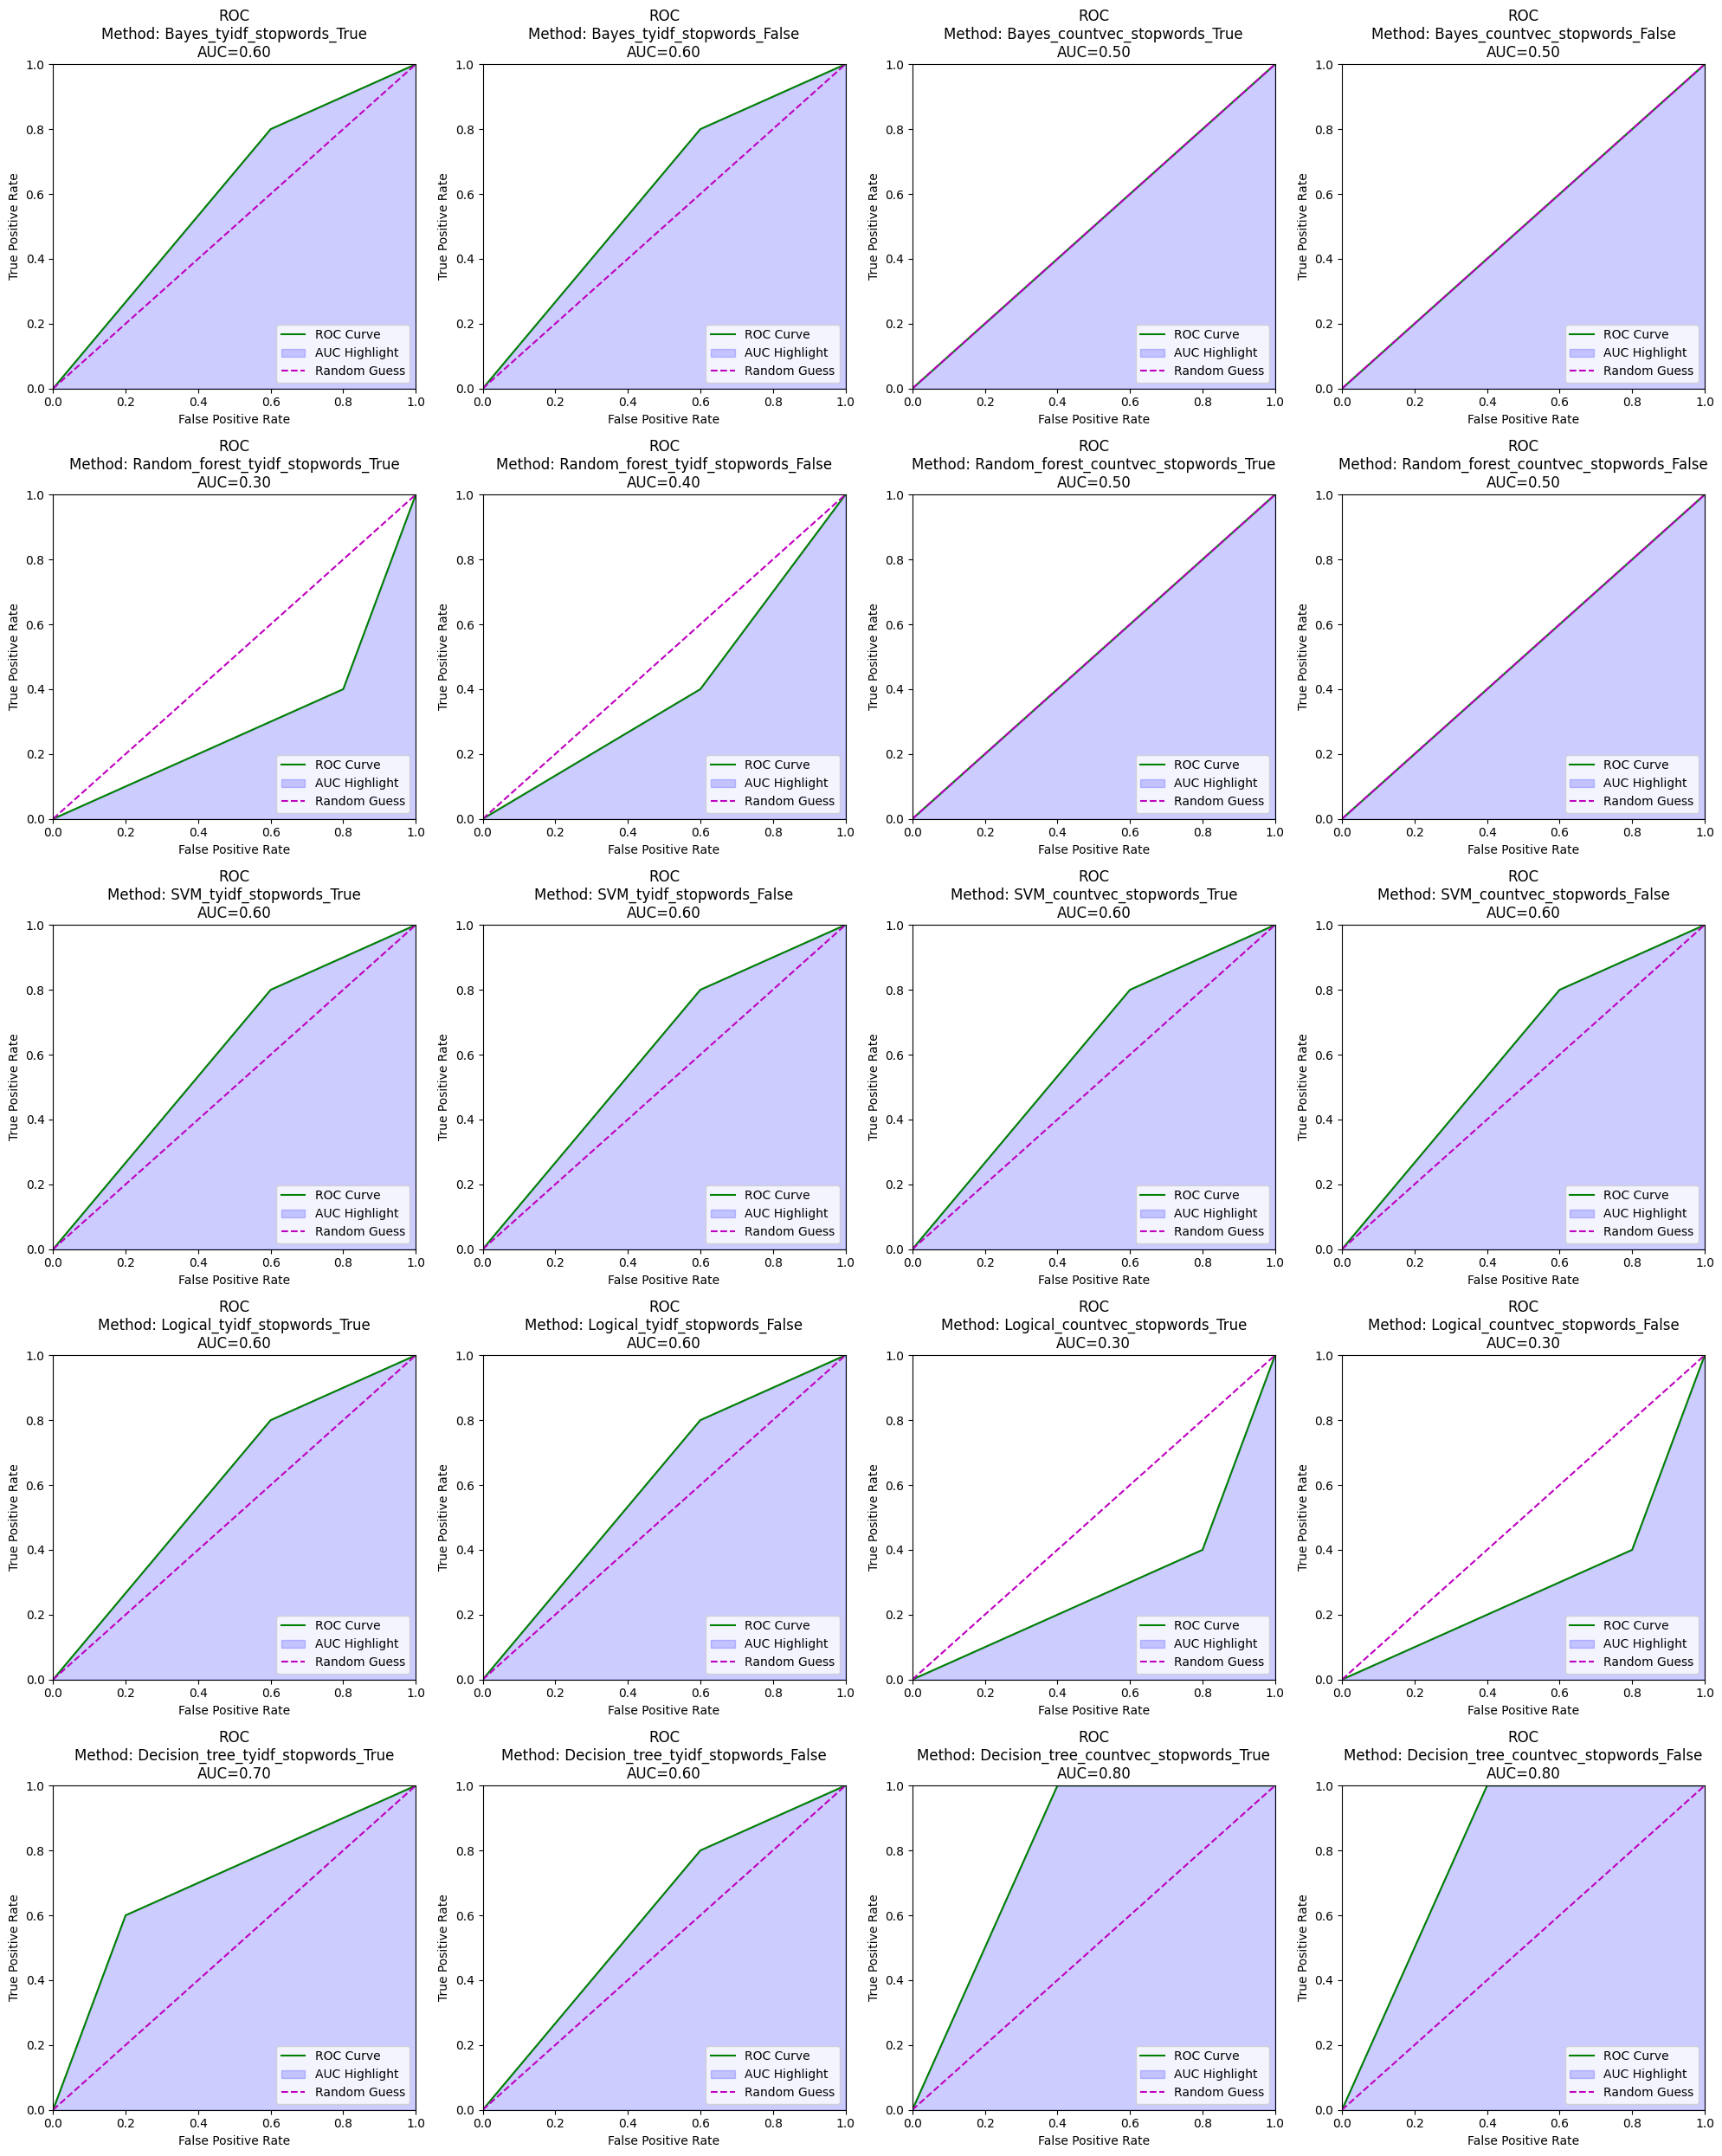

In [ ]:
# Layout parameter
num_plots = len(AUC_set)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, (key, value) in enumerate(AUC_set.items()):
    plot_ROC(axes[i], key, value, FPR_set[key], TPR_set[key])
for j in range(len(AUC_set), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Relevant comparisons and performance indicators of the ensamble model

In [ ]:
machine_method_set = ['Bayes', 'Random_forest', 'SVM', 'Logical', 'Decision_tree']

## Model 6: stacking ensamble
Based on the performance of the Stacking models, the following analysis can be made:

1. **Accuracy**:  
   - Stacking models using Naive Bayes as the base model achieve accuracies between 0.4 and 0.6.  
   - Stacking models using Random Forest as the base model achieve accuracies between 0.6 and 0.7.  
   - Stacking models using SVM as the base model achieve accuracies between 0.4 and 0.5.  
   - Stacking models using Logistic Regression as the base model achieve accuracies between 0.3 and 0.5.  
   - Stacking models using Decision Tree as the base model achieve accuracies between 0.4 and 0.6.

2. **AUC Scores**:  
   - Stacking models using Naive Bayes as the base model have AUC scores between 0.4 and 0.6.  
   - Stacking models using Random Forest as the base model have AUC scores between 0.6 and 0.7.  
   - Stacking models using SVM as the base model have AUC scores between 0.4 and 0.5.  
   - Stacking models using Logistic Regression as the base model have AUC scores between 0.3 and 0.5.  
   - Stacking models using Decision Tree as the base model have AUC scores between 0.4 and 0.6.

3. **Training and Evaluation Time**:  
   - The training time for stacking models is generally long, especially for stacking models using Random Forest as the base model, which have the longest training time at 83.286 seconds.

4. **Impact of Stopwords**:  
   - For most stacking models, the inclusion or exclusion of stopwords has minimal impact on accuracy and AUC scores.

### Conclusions:

- Stacking models using **Random Forest** as the base model perform the best, achieving the highest accuracy and AUC scores of 0.7.  
- Stacking models using **Logistic Regression** as the base model perform the worst, with the lowest accuracy and AUC scores.  
- **Stacking models require significant training time**, particularly when using computationally intensive base models like Random Forest.

### Possible Reasons for Observations:

1. **Choice of Base Models**:  
   Random Forest as a base model may provide richer feature combinations, improving the overall performance of the stacking model.

2. **Feature Diversity**:  
   Different base models offer varied perspectives, contributing to the stacking model's ability to generalize better.

3. **Model Complexity**:  
   Stacking models increase complexity by training multiple base models and a meta-model to combine their predictions. This complexity requires more data and computational resources for effective training.

In [ ]:
for method in machine_method_set:
    stacking_method(method, 'tyidf', True, df)
    stacking_method(method, 'tyidf', False, df)
    stacking_method(method, 'countvec', True, df)
    stacking_method(method, 'countvec', False, df)

Now the model is: stacking_Bayes_tyidf_stopwords_True
y_predict:
 [1 1 1 0 0 0 1 0 1 1]
classification report: 
               precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.50      0.60      0.55         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10

AUC: 0.5
Accuracy:  0.5
Train time:  1.1080167293548584
Evaluating time:  0.024999618530273438
Total time:  1.1330163478851318


Now the model is: stacking_Bayes_tyidf_stopwords_False
y_predict:
 [1 1 1 0 0 0 1 0 0 1]
classification report: 
               precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60  

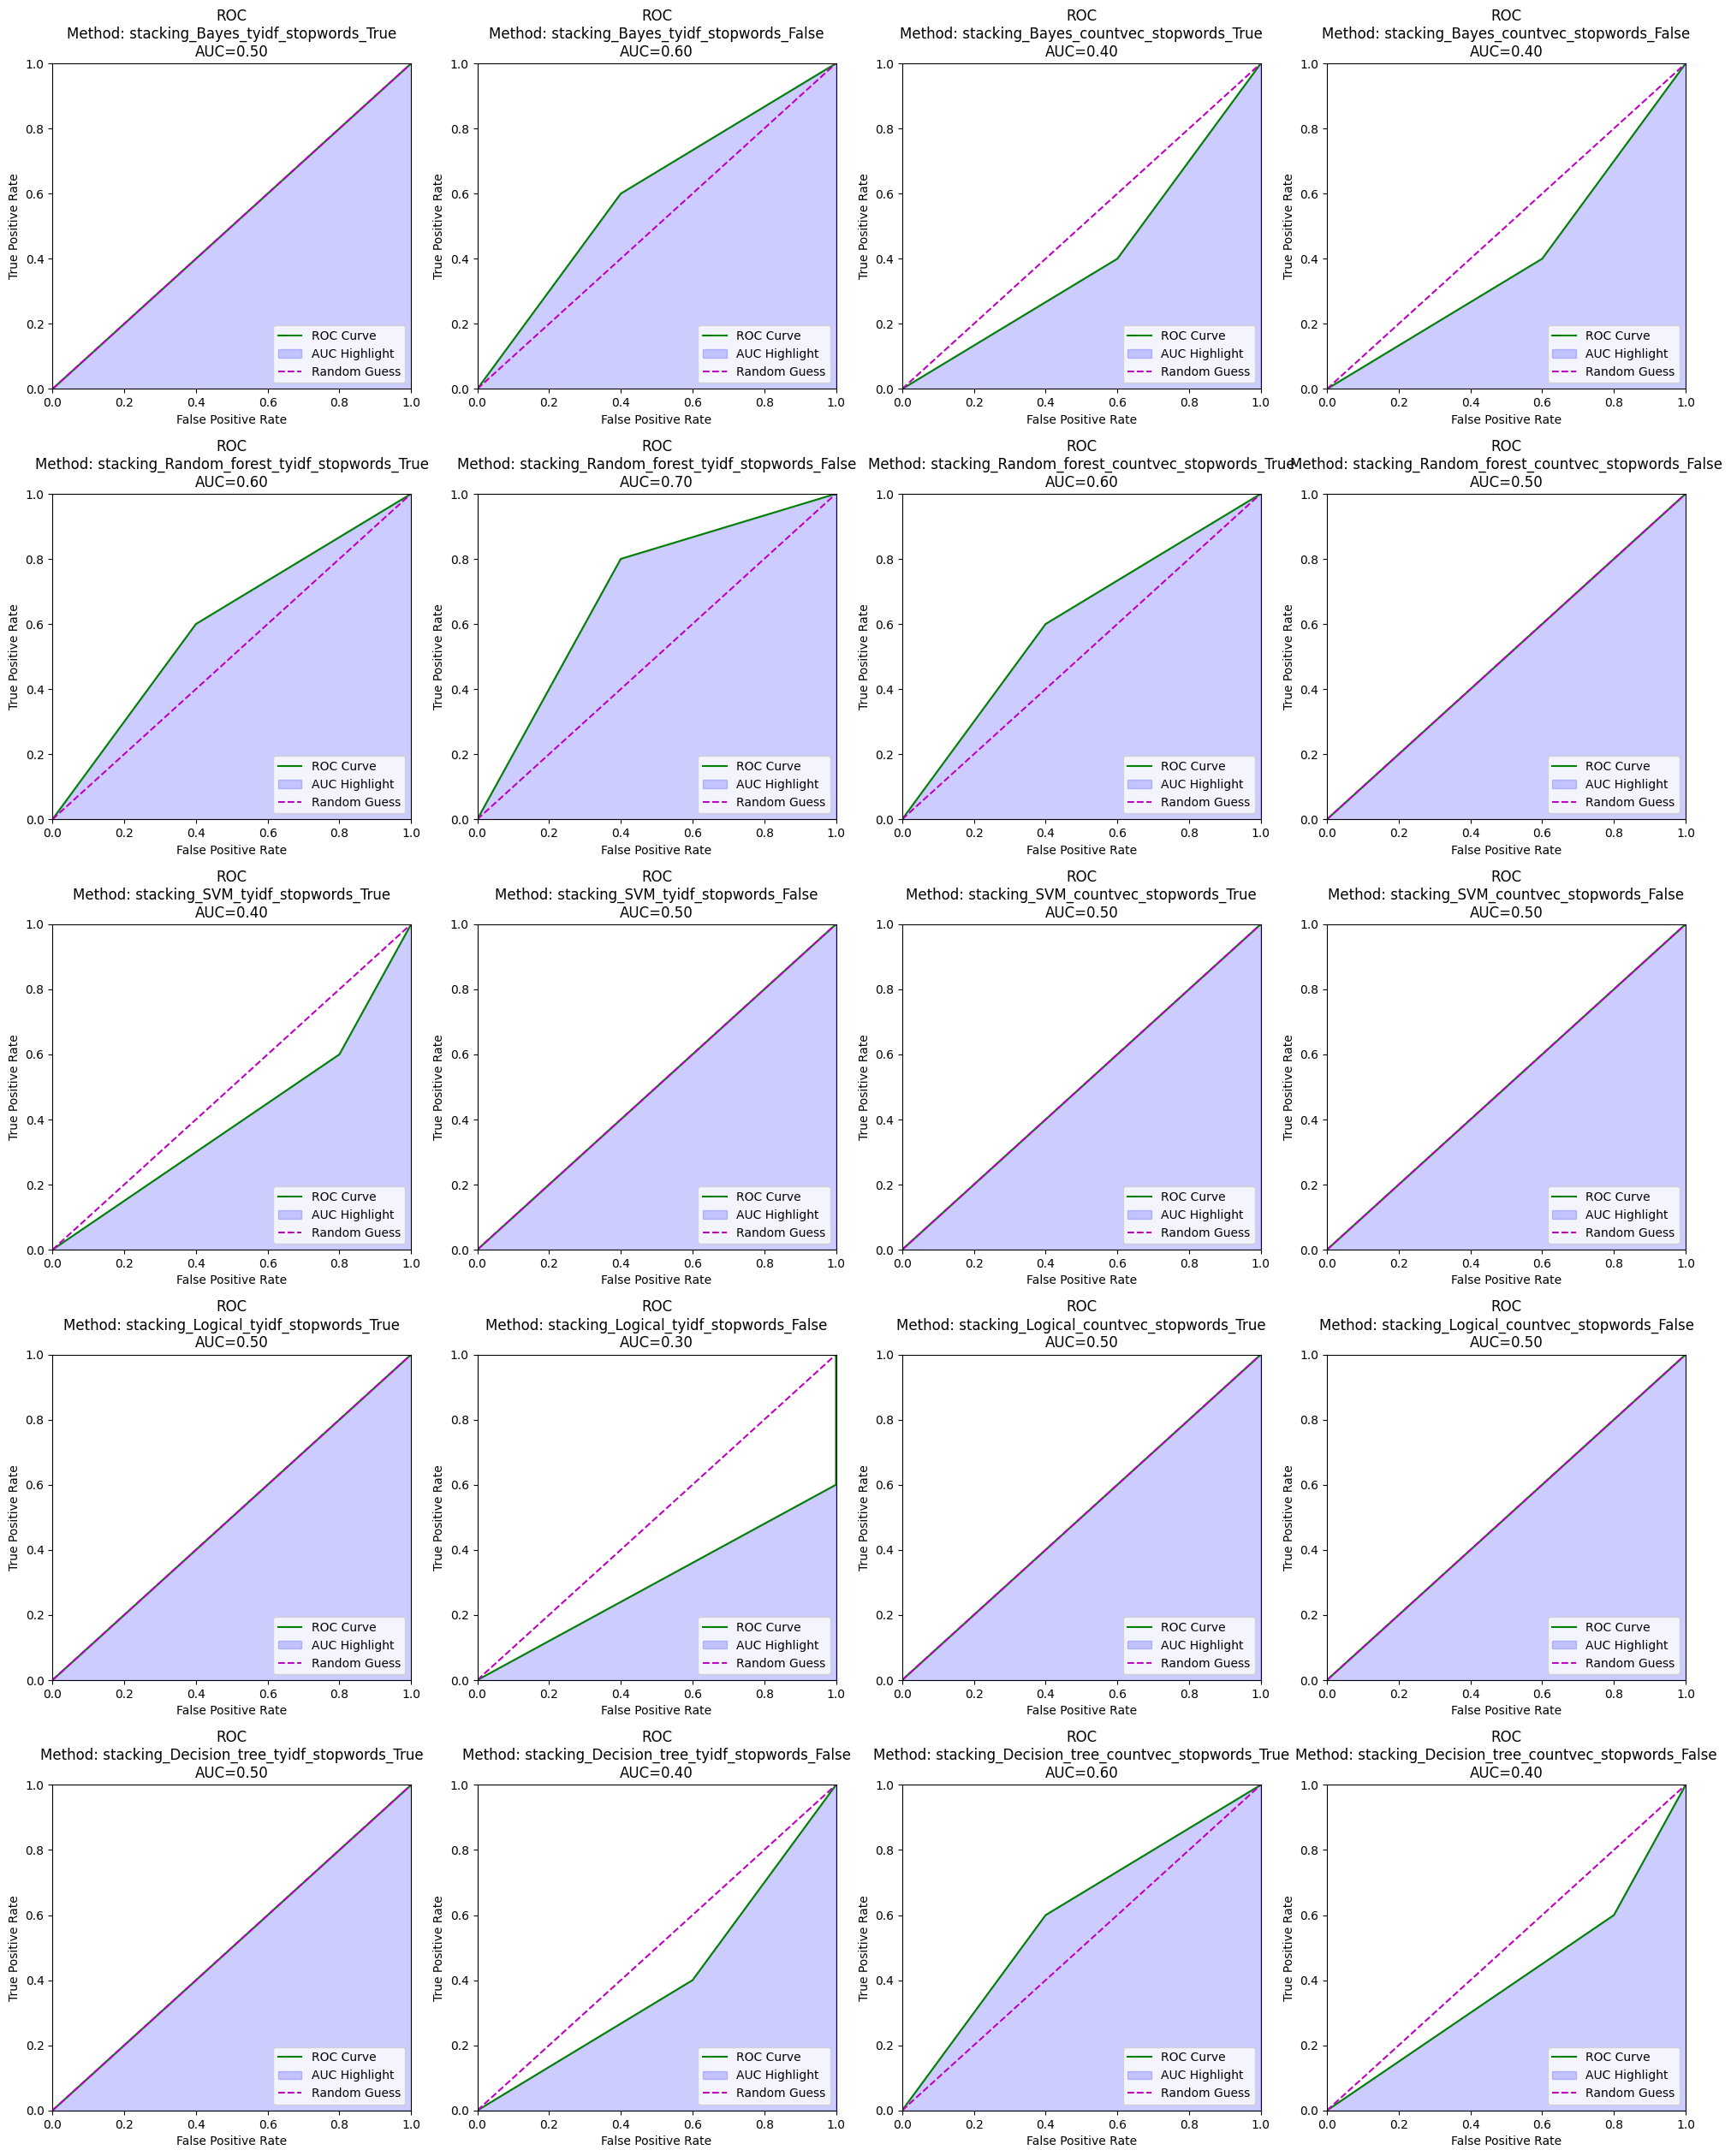

In [ ]:
# Layout parameter
num_plots = len(AUC_set)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, (key, value) in enumerate((k, v) for k, v in AUC_set.items() if 'stacking' in k):
    plot_ROC(axes[i], key, value, FPR_set[key], TPR_set[key])
for j in range(len([k for k in AUC_set if 'stacking' in k]), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Model 7: bagging model

Based on the performance outputs of the Bagging models, the following analysis can be made:

1. **Accuracy**:  
   - Bagging models using Naive Bayes as the base model achieve an accuracy of 0.6.  
   - Bagging models using Random Forest as the base model achieve an accuracy of 0.4.  
   - Bagging models using SVM as the base model achieve an accuracy of 0.5.  
   - Bagging models using Logistic Regression as the base model achieve an accuracy of 0.6 (with the TF-IDF vectorization method) and 0.4 (with the CountVec vectorization method).  
   - Bagging models using Decision Trees as the base model achieve an accuracy of 0.4 (with the TF-IDF vectorization method) and **0.9** (with the CountVec vectorization method).

2. **AUC Scores**:  
   - Bagging models using Naive Bayes as the base model have an AUC score of 0.6.  
   - Bagging models using Random Forest as the base model have an AUC score of 0.4.  
   - Bagging models using SVM as the base model have an AUC score of 0.5.  
   - Bagging models using Logistic Regression as the base model have an AUC score of 0.6 (with the TF-IDF vectorization method) and 0.4 (with the CountVec vectorization method).  
   - Bagging models using Decision Trees as the base model have an AUC score of 0.4 (with the TF-IDF vectorization method) and **0.9** (with the CountVec vectorization method).

3. **Training and Evaluation Time**:  
   - Training times for Bagging models are generally short, except for models using Random Forest as the base model, which have the longest training time of up to 101.490 seconds.

4. **Impact of Stopwords**:  
   - For most Bagging models, the inclusion or exclusion of stopwords has minimal impact on accuracy and AUC scores.

### Conclusions:

- Bagging models using **Decision Trees** as the base model perform best when using the CountVec vectorization method, achieving an accuracy and AUC score of 0.9.  
- Bagging models using **Random Forest** as the base model perform the worst, with both accuracy and AUC scores being low.  
- Bagging models generally have **shorter training times**, likely because the Bagging method improves performance by training multiple models on different subsets of the data and combining their predictions, which is often faster than training a single complex model.

### Possible Reasons for Observations:

1. **Choice of Base Models**:  
   The choice of base models significantly affects the performance of Bagging models. In this case, Decision Trees provide the best performance under the CountVec vectorization method.  

2. **Feature Diversity**:  
   The CountVec vectorization method may provide more diverse features, which could enhance the performance of Bagging models.  

3. **Model Stability**:  
   Bagging reduces model variance to improve stability, but its effectiveness depends on the diversity of base models and the quality of the dataset.

In [ ]:
for method in machine_method_set:
    bagging_method(method, 'tyidf', True, df)
    bagging_method(method, 'tyidf', False, df)
    bagging_method(method, 'countvec', True, df)
    bagging_method(method, 'countvec', False, df)


Now the model is: bagging_Bayes_tyidf_stopwords_True
y_predict:
 [0 1 0 1 1 0 1 1 1 1]
classification report: 
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10

AUC: 0.6000000000000001
Accuracy:  0.6
Train time:  0.08300375938415527
Evaluating time:  0.021994829177856445
Total time:  0.10499858856201172


Now the model is: bagging_Bayes_tyidf_stopwords_False
y_predict:
 [0 1 0 1 1 0 1 1 1 1]
classification report: 
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0

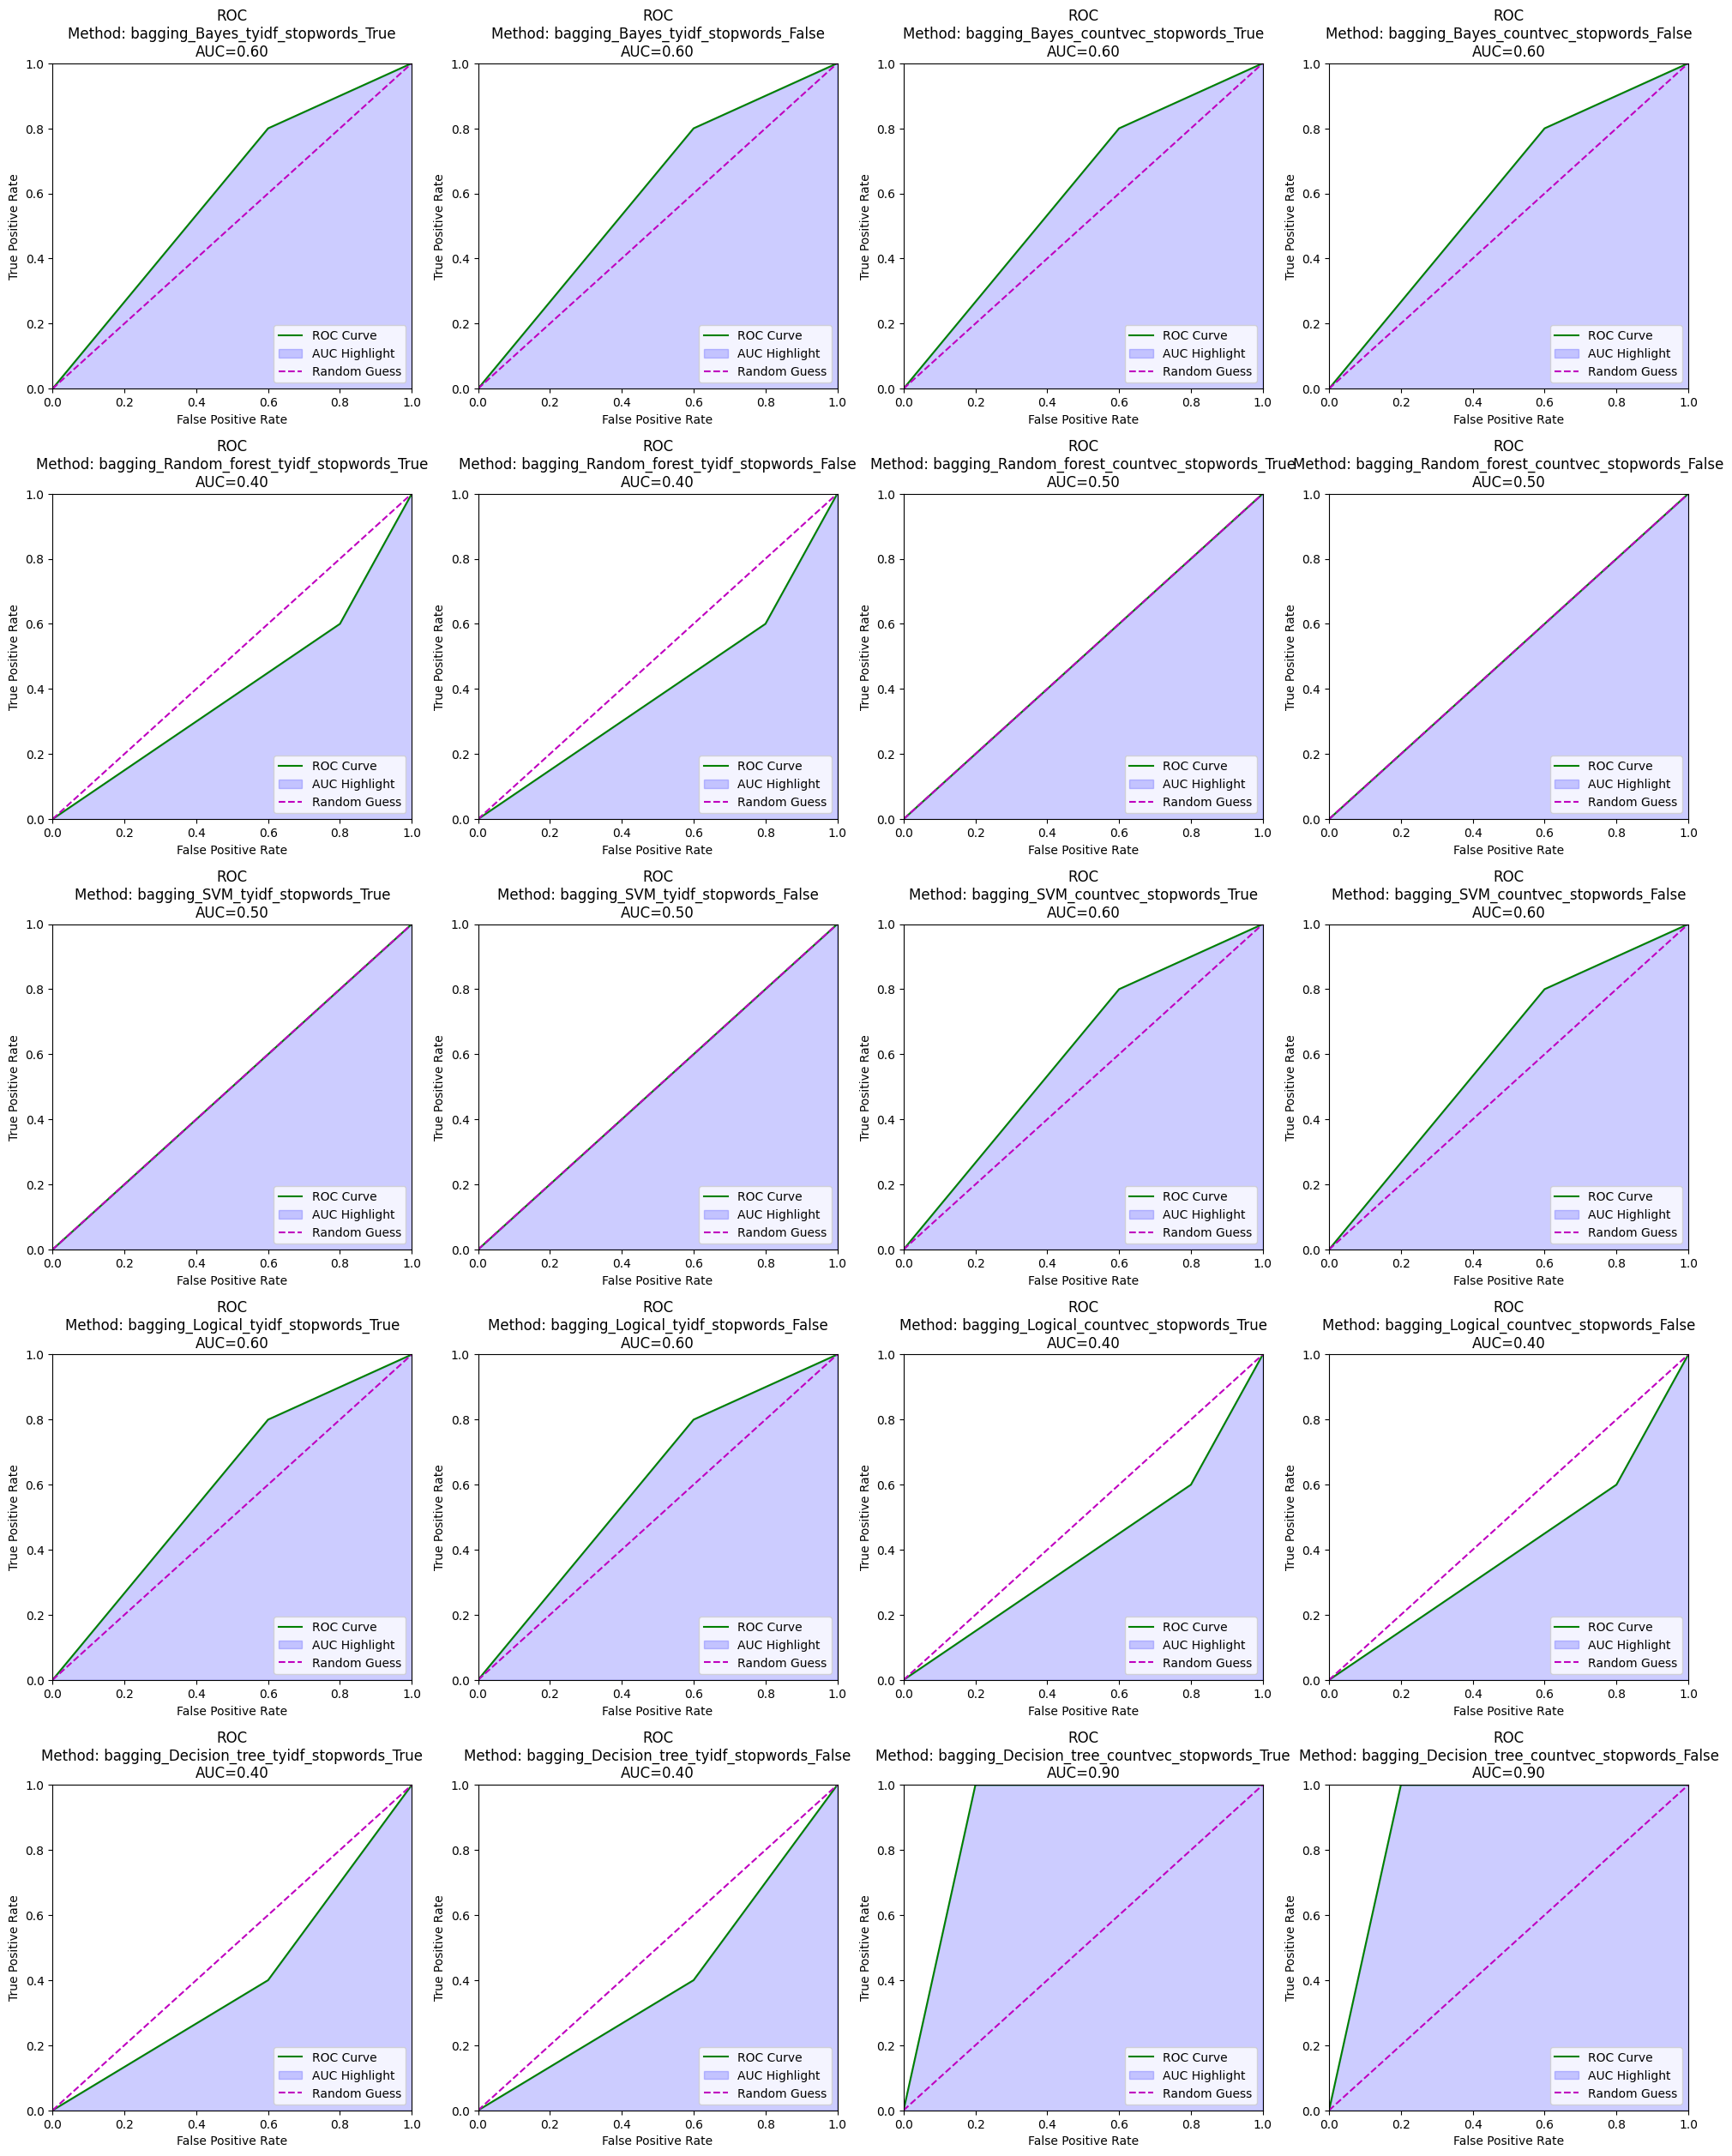

In [ ]:
# Layout parameter
num_plots = len(AUC_set)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, (key, value) in enumerate((k, v) for k, v in AUC_set.items() if 'bagging' in k):
    plot_ROC(axes[i], key, value, FPR_set[key], TPR_set[key])
for j in range(len([k for k in AUC_set if 'bagging' in k]), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Following are neutral network output

After many attempts and experiments, we try to get the neural network with the highest AUC by modifying the parameters many times. I found that the training of the neural network was extremely unstable on small data sets, with an AUC range of 0.4-0.85, which is a large span. Because the training process of neural network is unknowable, the trained model has strong randomness, and even AUC=1 May occur. However, compared with the three mainstream neural network models, LSTM and CNN model have better overall performance than RNN model in the task of identifying the truth and fallibility of stories.

Reason may be: 

**Advantages of the model structure**: When the CNN model processes image and text data, its convolutional layer is able to capture local features, which may also play a role in text classification tasks. Because of its gating mechanism, LSTM model can deal with dependencies in sequence data better.

## Model 8: RNN
test loss has the trend to increase, so stopped at 10 epochs

e:\anaconda\envs\Python3.10\lib\site-packages\torch\nn\modules\rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/10, Train Loss: 0.7156, Test Loss: 0.6494
Epoch 2/10, Train Loss: 0.7051, Test Loss: 0.6506
Epoch 3/10, Train Loss: 0.6971, Test Loss: 0.6523
Epoch 4/10, Train Loss: 0.6850, Test Loss: 0.6529
Epoch 5/10, Train Loss: 0.6747, Test Loss: 0.6546
Epoch 6/10, Train Loss: 0.6667, Test Loss: 0.6560
Epoch 7/10, Train Loss: 0.6598, Test Loss: 0.6577
Epoch 8/10, Train Loss: 0.6498, Test Loss: 0.6595
Epoch 9/10, Train Loss: 0.6408, Test Loss: 0.6613
Epoch 10/10, Train Loss: 0.6347, Test Loss: 0.6631


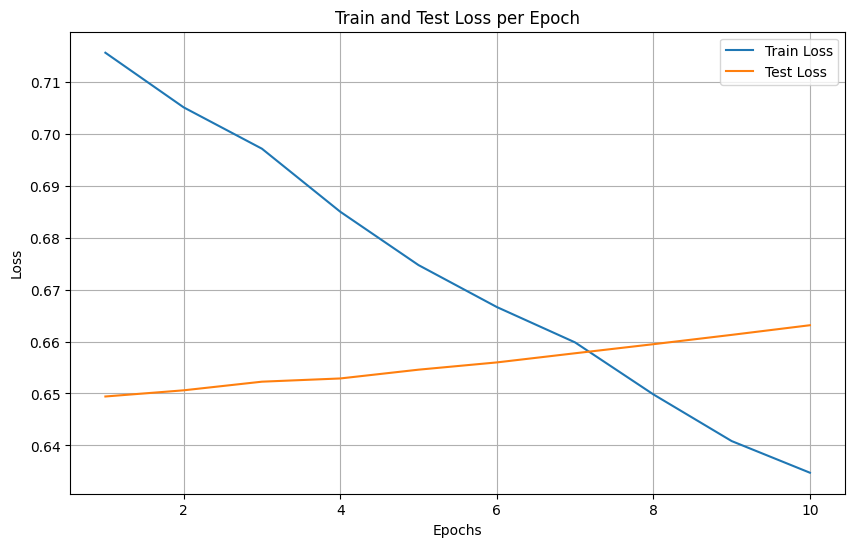

Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.80      0.67         5
         1.0       0.67      0.40      0.50         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10

AUC Score: 0.64


In [22]:
model = RNNClassifier(vocab_size=len(vocab), embed_size=128, hidden_size=128, output_size=1, num_layers=1, dropout=0.3)
deep_train(model, 10)

## Model 9: LSTM
AUC best at 10epoch, and keep training until 50 epoch, test loss has the trend of increasing, so stopped but overfitted.

e:\anaconda\envs\Python3.10\lib\site-packages\torch\nn\modules\rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/10, Train Loss: 0.6961, Test Loss: 0.6750
Epoch 2/10, Train Loss: 0.6913, Test Loss: 0.6750
Epoch 3/10, Train Loss: 0.6875, Test Loss: 0.6750
Epoch 4/10, Train Loss: 0.6840, Test Loss: 0.6749
Epoch 5/10, Train Loss: 0.6801, Test Loss: 0.6746
Epoch 6/10, Train Loss: 0.6771, Test Loss: 0.6749
Epoch 7/10, Train Loss: 0.6727, Test Loss: 0.6750
Epoch 8/10, Train Loss: 0.6691, Test Loss: 0.6751
Epoch 9/10, Train Loss: 0.6659, Test Loss: 0.6752
Epoch 10/10, Train Loss: 0.6629, Test Loss: 0.6753


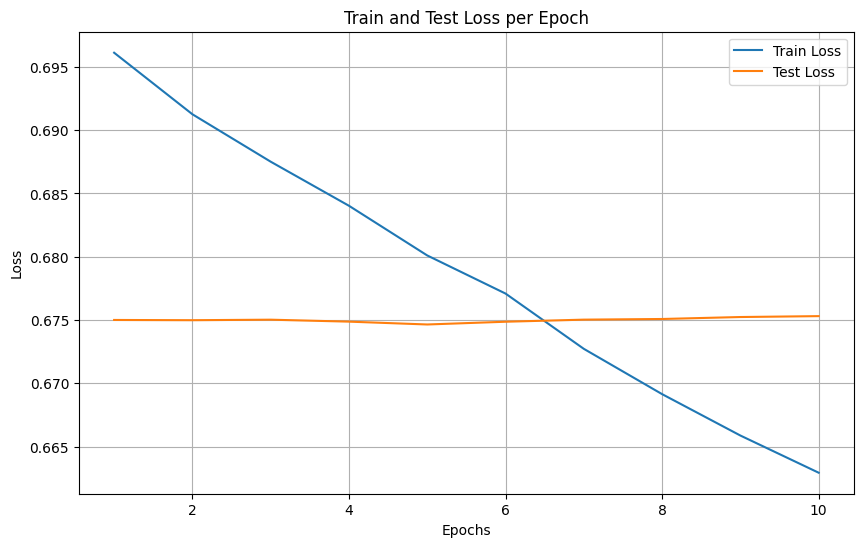

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.60      0.67         5
         1.0       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10

AUC Score: 0.8400000000000001


In [8]:
model = LSTMClassifier(vocab_size=len(vocab), embed_size=128, hidden_size=128, output_size=1, num_layers=1, dropout=0.6)
deep_train(model, 10)

e:\anaconda\envs\Python3.10\lib\site-packages\torch\nn\modules\rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/50, Train Loss: 0.6975, Test Loss: 0.6933
Epoch 2/50, Train Loss: 0.6932, Test Loss: 0.6925
Epoch 3/50, Train Loss: 0.6897, Test Loss: 0.6922
Epoch 4/50, Train Loss: 0.6864, Test Loss: 0.6922
Epoch 5/50, Train Loss: 0.6832, Test Loss: 0.6920
Epoch 6/50, Train Loss: 0.6797, Test Loss: 0.6918
Epoch 7/50, Train Loss: 0.6767, Test Loss: 0.6916
Epoch 8/50, Train Loss: 0.6741, Test Loss: 0.6915
Epoch 9/50, Train Loss: 0.6704, Test Loss: 0.6914
Epoch 10/50, Train Loss: 0.6686, Test Loss: 0.6912
Epoch 11/50, Train Loss: 0.6648, Test Loss: 0.6910
Epoch 12/50, Train Loss: 0.6606, Test Loss: 0.6911
Epoch 13/50, Train Loss: 0.6580, Test Loss: 0.6912
Epoch 14/50, Train Loss: 0.6551, Test Loss: 0.6912
Epoch 15/50, Train Loss: 0.6516, Test Loss: 0.6913
Epoch 16/50, Train Loss: 0.6486, Test Loss: 0.6912
Epoch 17/50, Train Loss: 0.6454, Test Loss: 0.6913
Epoch 18/50, Train Loss: 0.6417, Test Loss: 0.6913
Epoch 19/50, Train Loss: 0.6382, Test Loss: 0.6914
Epoch 20/50, Train Loss: 0.6349, Test Lo

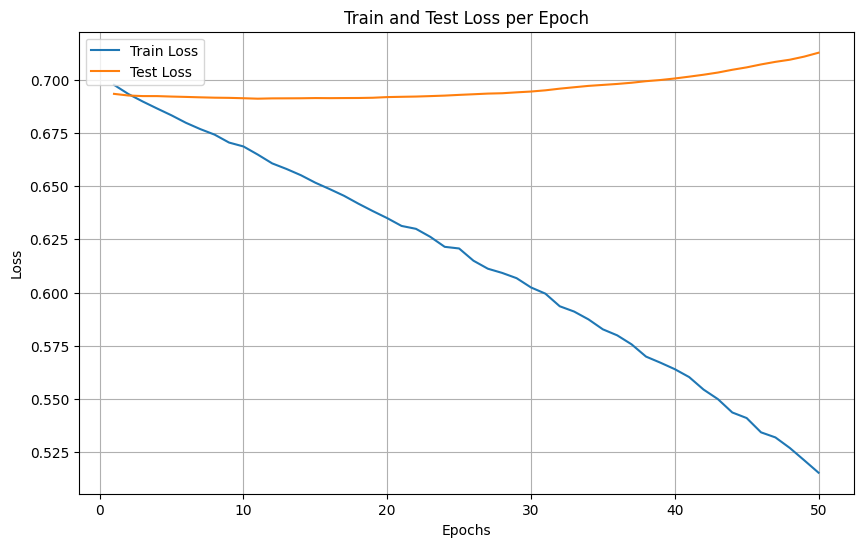

Classification Report:
               precision    recall  f1-score   support

         0.0       0.40      0.40      0.40         5
         1.0       0.40      0.40      0.40         5

    accuracy                           0.40        10
   macro avg       0.40      0.40      0.40        10
weighted avg       0.40      0.40      0.40        10

AUC Score: 0.36


In [13]:
model = LSTMClassifier(vocab_size=len(vocab), embed_size=128, hidden_size=128, output_size=1, num_layers=1, dropout=0.6)
deep_train(model, 50)
# test loss has the trend of increase at 50 epoch, so stopped, but overfitted

## Model 10: CNN
best AUC at 10 epoches, and then overfitting. 

Epoch 1/10, Train Loss: 0.7900, Test Loss: 0.6754
Epoch 2/10, Train Loss: 0.7312, Test Loss: 0.6718
Epoch 3/10, Train Loss: 0.7663, Test Loss: 0.6696
Epoch 4/10, Train Loss: 0.6422, Test Loss: 0.6689
Epoch 5/10, Train Loss: 0.7772, Test Loss: 0.6688
Epoch 6/10, Train Loss: 0.6712, Test Loss: 0.6689
Epoch 7/10, Train Loss: 0.6500, Test Loss: 0.6686
Epoch 8/10, Train Loss: 0.6758, Test Loss: 0.6682
Epoch 9/10, Train Loss: 0.6101, Test Loss: 0.6679
Epoch 10/10, Train Loss: 0.5661, Test Loss: 0.6676


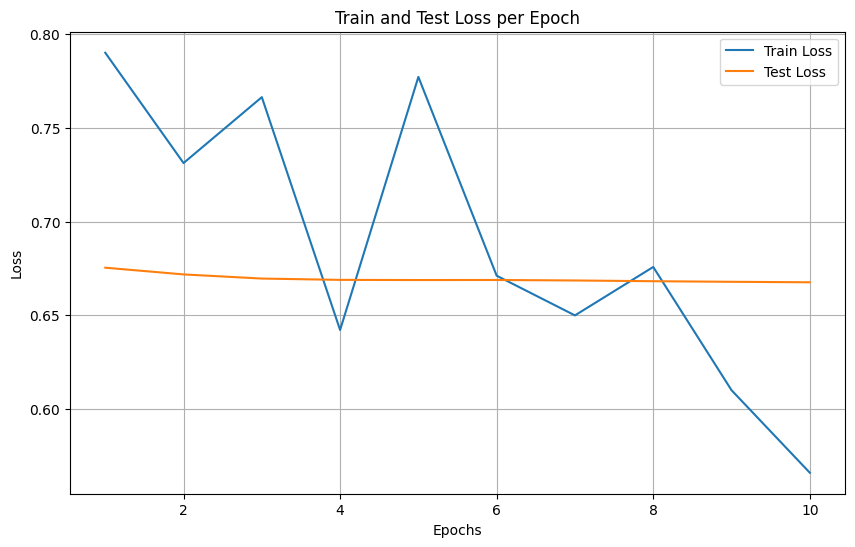

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

AUC Score: 0.8


In [ ]:
vocab_size = len(vocab)
embed_size = 128
num_classes = 1  
filter_sizes = [3, 4, 5]  
num_filters = 100 
dropout = 0.5

model = CNNClassifier(vocab_size, embed_size, num_classes, filter_sizes, num_filters, dropout)
deep_train(model, 10)


Epoch 1/50, Train Loss: 0.8065, Test Loss: 0.7121
Epoch 2/50, Train Loss: 0.7196, Test Loss: 0.7021
Epoch 3/50, Train Loss: 0.8411, Test Loss: 0.6957
Epoch 4/50, Train Loss: 0.7084, Test Loss: 0.6928
Epoch 5/50, Train Loss: 0.6639, Test Loss: 0.6914
Epoch 6/50, Train Loss: 0.6446, Test Loss: 0.6918
Epoch 7/50, Train Loss: 0.6925, Test Loss: 0.6928
Epoch 8/50, Train Loss: 0.6070, Test Loss: 0.6936
Epoch 9/50, Train Loss: 0.6106, Test Loss: 0.6942
Epoch 10/50, Train Loss: 0.5770, Test Loss: 0.6945
Epoch 11/50, Train Loss: 0.5367, Test Loss: 0.6945
Epoch 12/50, Train Loss: 0.5183, Test Loss: 0.6941
Epoch 13/50, Train Loss: 0.5999, Test Loss: 0.6936
Epoch 14/50, Train Loss: 0.4551, Test Loss: 0.6937
Epoch 15/50, Train Loss: 0.5482, Test Loss: 0.6936
Epoch 16/50, Train Loss: 0.5594, Test Loss: 0.6934
Epoch 17/50, Train Loss: 0.5476, Test Loss: 0.6931
Epoch 18/50, Train Loss: 0.4752, Test Loss: 0.6932
Epoch 19/50, Train Loss: 0.4322, Test Loss: 0.6934
Epoch 20/50, Train Loss: 0.4879, Test Lo

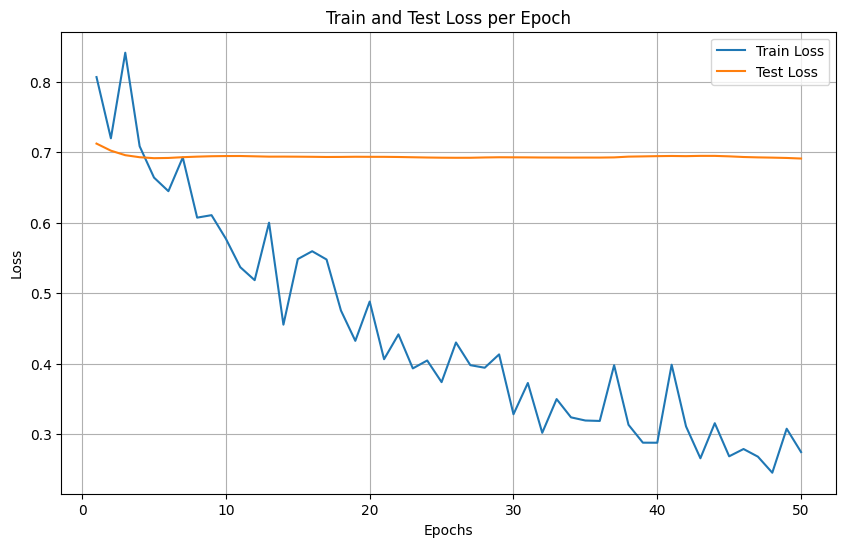

Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.60      0.55         5
         1.0       0.50      0.40      0.44         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10

AUC Score: 0.52


In [21]:
model = CNNClassifier(vocab_size, embed_size, num_classes, filter_sizes, num_filters, dropout)
deep_train(model, 50)

# 7 Conclusions

Based on the performance outputs of all models, we can draw the following conclusions and explain the underlying reasons:

In the task of distinguishing the authenticity of stories, neural network-based models (especially CNN and LSTM) outperform traditional machine learning models (such as Naive Bayes, SVM, Decision Tree, Random Forest, and Logistic Regression). In the traditional machine learning model, decision tree is the best and its performance could exceed RNN, which shows its strong capability in binary classification. 

Reasons may be: 

1. **Feature Learning Capabilities**:
   - Neural networks can automatically learn data representations without the need for manual feature engineering. This is particularly valuable in text classification tasks, as they can learn more abstract features directly from raw text.
   - In contrast, traditional machine learning models rely heavily on meticulously designed feature engineering, which is time-consuming and may fail to capture all relevant aspects of the data.

2. **Model Performance and Stability**:
   - In terms of performance metrics, neural network models demonstrate higher accuracy and AUC scores compared to traditional models, indicating their superior effectiveness in distinguishing true and false stories.
   - However, they are not stable. 

Considering the performance, complexity, feature learning capabilities, and generalization ability, neural network models (especially CNN and LSTM) outperform traditional models in the task of distinguishing story authenticity. These models automatically learn complex feature representations and capture deep semantic information within textual data, resulting in more accurate classification outcomes. Therefore, for tasks involving text understanding and classification, neural network models are a robust and highly effective choice.

# 8 References
1. [jieba分词4种模式示例_jieba分词实例-CSDN博客](https://blog.csdn.net/weixin_40122615/article/details/103920499)

2. 肖驰. (2020). 四种机器学习算法在mnist数据集上的对比研究. 智能计算机与应用.
3. [AUC详解](https://wenku.csdn.net/column/3o7vy7dotv)
4. 董其成, 何利文. 基于ARIMA-CNN-LSTM的股票价格预测[J]. 软件工程与应用, 2024, 13(5): 729-737.
5. ALLCOTT H , GENTZKOW M .Social media and fake news in the 2016 election[J]. Journal of Economic Perspectives, 2017,31(2): 211-36.
6. 郑洪浩, 郝一诺, 于洪涛 ,等 基于改进 Transformer 的社交媒体谣言检测[J]. 网络与信息安全学报, 2022,8(4): 168-174.
7. CHENG M X , NAZARIAN S , BOGDAN P .Vroc:variational autoencoder-aided multi-task rumor classifier based on text[C]// Proc of the Web Conference 2020. 2020: 2892-2898.
8. 亓鹏, 曹娟, 盛强 .语义增强的多模态虚假新闻检测[J]. 计算机研究与发展, 2021,58(7): 1456-1465.
9. 高国鹏,房耀东,韩彦芳,钱振兴,秦川.面向虚假新闻检测的社交媒体多模态数据集构建[J].网络与信息安全学报,2023,9(4):144-154
10. [真伪新闻实战](https://blog.csdn.net/oandy0/article/details/137439408)